<a href="https://colab.research.google.com/github/JerKeller/MP-Ecotaxa/blob/main/ecotaxa_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries, dataset, extract colums needed

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import sys
import subprocess
from plotnine import ggplot, aes, geom_point, geom_line, labs, ggtitle, scale_y_log10
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
ecotaxa_export = '/content/drive/MyDrive/Ecotaxa_analysis/ecotaxa_export_yr.tsv'
tsv_read = pd.read_csv(ecotaxa_export, sep='\t')

Extract columns needed

In [16]:
sub1 = tsv_read[['object_id', 'object_date', 'object_depth_min', 'object_depth_max', 'object_annotation_category',
                 'object_area', 'object_area_exc', 'object_major', 'object_minor', 'sample_tot_vol', 'process_particle_pixel_size_mm',
                 'acq_id']]

Modify names of columns

In [17]:
sub1.columns = ['Label', 'Date', 'Min_depth', 'Max_depth', 'Taxa', 'area', 'areaExc', 'major', 'minor',
                'Tow_Vol', 'pixel_size_mm', 'acq_id']

Remove not living organisms

In [18]:
sub2 = sub1[(sub1['Taxa'] != 'badfocus<artefact') & (sub1['Taxa'] != 'fiber<detritus') &
            (sub1['Taxa'] != 'multiple<other') & (sub1['Taxa'] != 'detritus') &
            (sub1['Taxa'] != 'egg sac<egg') & (sub1['Taxa'] != 't001') &
            (sub1['Taxa'] != 't002') & (sub1['Taxa'] != 't003') &
            (sub1['Taxa'] != 'othertocheck') & (sub1['Taxa'] != 'artefact') &
            (sub1['Taxa'] != 'bubble') & (sub1['Taxa'] != 'dead<Copepoda')].copy()


In [19]:
print(sub2)

                      Label      Date  Min_depth  Max_depth  \
0         49_230302_tot_1_1  20230302        0.0      100.0   
2         49_230302_tot_1_3  20230302        0.0      100.0   
4         49_230302_tot_1_5  20230302        0.0      100.0   
5         49_230302_tot_1_6  20230302        0.0      100.0   
6         49_230302_tot_1_7  20230302        0.0      100.0   
...                     ...       ...        ...        ...   
54333  n9_221013_tot_1_1461  20221013        0.0      100.0   
54334  n9_221013_tot_1_1462  20221013        0.0      100.0   
54335  n9_221013_tot_1_1463  20221013        0.0      100.0   
54339  n9_221013_tot_1_1467  20221013        0.0      100.0   
54340  n9_221013_tot_1_1468  20221013        0.0      100.0   

                       Taxa    area  areaExc  major  minor  Tow_Vol  \
0      Eudiaptomus gracilis  3223.0   3221.0   94.5   43.4   7.0686   
2      Eudiaptomus gracilis  1964.0   1964.0   69.0   36.3   7.0686   
4      Eudiaptomus gracilis  3

In [20]:
sub2['Date'] = pd.to_datetime(sub2['Date'], format='%Y%m%d')

In [21]:
# Conversions from pixel to mm
sub2['Area_mm2'] = sub2['area'] * ((sub2['pixel_size_mm']) ** 2)
sub2['AreaExc_mm2'] = sub2['areaExc'] * ((sub2['pixel_size_mm']) ** 2)
sub2['Major_mm'] = sub2['major'] * sub2['pixel_size_mm']
sub2['Minor_mm'] = sub2['minor'] * sub2['pixel_size_mm']

sub2['V_mm3'] = (4 / 3) * np.pi * ((sub2['Major_mm'] / 2) * (sub2['Minor_mm'] / 2) * (sub2['Minor_mm'] / 2))

In [22]:
sub2['Biovol'] = sub2['V_mm3'] / sub2['Tow_Vol']
sub2['Concentration'] = 1/sub2['Tow_Vol']


In [23]:
print(sub2)

                      Label       Date  Min_depth  Max_depth  \
0         49_230302_tot_1_1 2023-03-02        0.0      100.0   
2         49_230302_tot_1_3 2023-03-02        0.0      100.0   
4         49_230302_tot_1_5 2023-03-02        0.0      100.0   
5         49_230302_tot_1_6 2023-03-02        0.0      100.0   
6         49_230302_tot_1_7 2023-03-02        0.0      100.0   
...                     ...        ...        ...        ...   
54333  n9_221013_tot_1_1461 2022-10-13        0.0      100.0   
54334  n9_221013_tot_1_1462 2022-10-13        0.0      100.0   
54335  n9_221013_tot_1_1463 2022-10-13        0.0      100.0   
54339  n9_221013_tot_1_1467 2022-10-13        0.0      100.0   
54340  n9_221013_tot_1_1468 2022-10-13        0.0      100.0   

                       Taxa    area  areaExc  major  minor  Tow_Vol  \
0      Eudiaptomus gracilis  3223.0   3221.0   94.5   43.4   7.0686   
2      Eudiaptomus gracilis  1964.0   1964.0   69.0   36.3   7.0686   
4      Eudiaptomus

<ipython-input-36-6770cd658b82>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


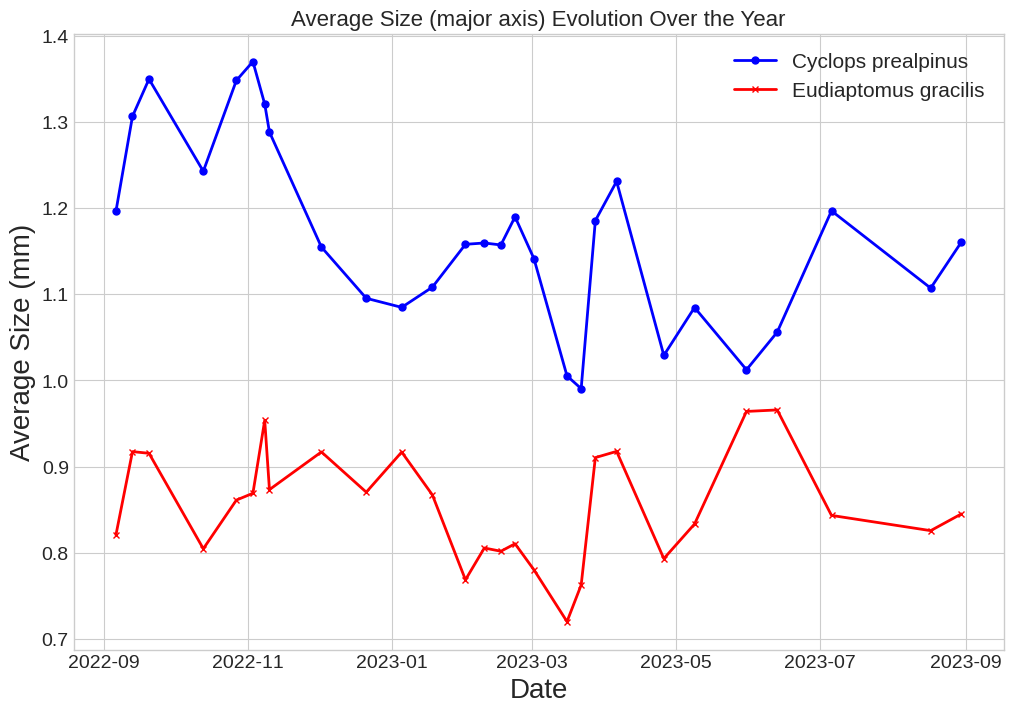

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Styles
plt.style.use('seaborn-whitegrid')

# Convert the 'Date' column to datetime if it's not already
sub2['Date'] = pd.to_datetime(sub2['Date'])

# Filter data to only include observations of "Cyclops prealpinus" and "Eudiaptomus gracilis"
cyclops_data = sub2[sub2['Taxa'] == 'Cyclops prealpinus']
eudiaptomus_data = sub2[sub2['Taxa'] == 'Eudiaptomus gracilis']

# Group the data by date and calculate the average size for each date
grouped_cyclops = cyclops_data.groupby('Date')['Major_mm'].mean().reset_index()
grouped_eudiaptomus = eudiaptomus_data.groupby('Date')['Major_mm'].mean().reset_index()

# Create a plot to show the average size evolution
fig, ax = plt.subplots(figsize=(12, 8))

# Add Cyclops prealpinus data
ax.plot(grouped_cyclops['Date'], grouped_cyclops['Major_mm'], label='Cyclops prealpinus',
       linestyle='-', marker='o', markersize=5, linewidth=2, color='b')

# Add Eudiaptomus gracilis data
ax.plot(grouped_eudiaptomus['Date'], grouped_eudiaptomus['Major_mm'], label='Eudiaptomus gracilis',
       linestyle='-', marker='x', markersize=5, linewidth=2, color='r')

# Add labels and title with increased font sizes
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Average Size (mm)', fontsize=20)
ax.set_title('Average Size (major axis) Evolution Over the Year', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
# Add legend with increased font size
ax.legend(fontsize=15)

# Add grid
ax.grid(True)

# Show plot
plt.show()


<ipython-input-35-342574ca8866>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


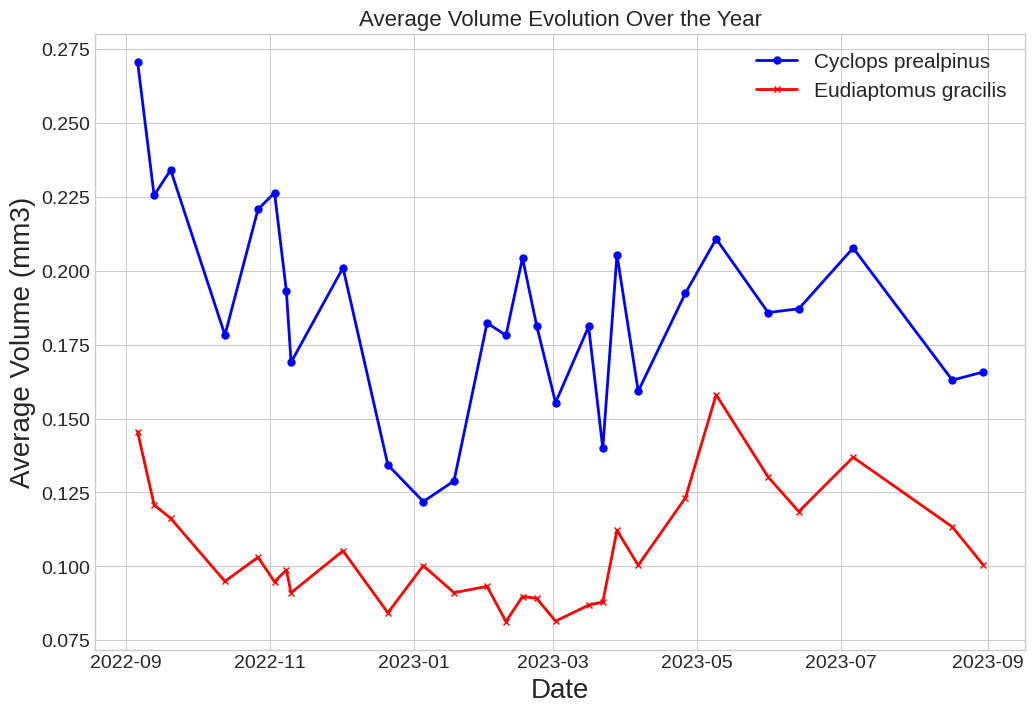

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Styles
plt.style.use('seaborn-whitegrid')

# Convert the 'Date' column to datetime if it's not already
sub2['Date'] = pd.to_datetime(sub2['Date'])

# Filter data to only include observations of "Cyclops prealpinus" and "Eudiaptomus gracilis"
cyclops_data = sub2[sub2['Taxa'] == 'Cyclops prealpinus']
eudiaptomus_data = sub2[sub2['Taxa'] == 'Eudiaptomus gracilis']

# Group the data by date and calculate the average size for each date
grouped_cyclops = cyclops_data.groupby('Date')['V_mm3'].mean().reset_index()
grouped_eudiaptomus = eudiaptomus_data.groupby('Date')['V_mm3'].mean().reset_index()

# Create a plot to show the average size evolution
fig, ax = plt.subplots(figsize=(12, 8))

# Add Cyclops prealpinus data
ax.plot(grouped_cyclops['Date'], grouped_cyclops['V_mm3'], label='Cyclops prealpinus',
       linestyle='-', marker='o', markersize=5, linewidth=2, color='b')

# Add Eudiaptomus gracilis data
ax.plot(grouped_eudiaptomus['Date'], grouped_eudiaptomus['V_mm3'], label='Eudiaptomus gracilis',
       linestyle='-', marker='x', markersize=5, linewidth=2, color='r')

# Add labels and title with increased font sizes
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Average Volume (mm3)', fontsize=20)
ax.set_title('Average Volume Evolution Over the Year', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)


# Add legend with increased font size
ax.legend(fontsize=15)

# Add grid
ax.grid(True)

# Show plot
plt.show()


In [263]:
max50_sub2 = sub2[(sub2['Min_depth'] == 0) & (sub2['Max_depth'] == 50)]

max100_sub2 = sub2[(sub2['Min_depth'] == 50) & (sub2['Max_depth'] == 100)]

tot100 = sub2[(sub2['Min_depth'] == 0) & (sub2['Max_depth'] == 100)]

In [265]:
# Grouper par 'Label', 'Taxa', et 'Date', puis calculer la somme de 'Biovolume'
grouped_m50 = max50_sub2.groupby(['acq_id', 'Taxa', 'Date']).agg({'Biovol': 'sum','Concentration':'sum'}).reset_index()

# Ajouter une colonne pour le comptage d'individus
grouped_m50['Count'] = max50_sub2.groupby(['acq_id', 'Taxa', 'Date']).size().reset_index(name='Counts')['Counts']

# Grouper par 'Label', 'Taxa', et 'Date', puis calculer la somme de 'Biovolume'
grouped_m100 = max100_sub2.groupby(['acq_id', 'Taxa', 'Date']).agg({'Biovol': 'sum','Concentration':'sum'}).reset_index()

# Ajouter une colonne pour le comptage d'individus
grouped_m100['Count'] = max100_sub2.groupby(['acq_id', 'Taxa', 'Date']).size().reset_index(name='Counts')['Counts']

# Grouper par 'Label', 'Taxa', et 'Date', puis calculer la somme de 'Biovolume'
grouped_tot100 = tot100.groupby(['acq_id', 'Taxa', 'Date']).agg({'Biovol': 'sum','Concentration':'sum'}).reset_index()

# Ajouter une colonne pour le comptage d'individus
grouped_tot100['Count'] = tot100.groupby(['acq_id', 'Taxa', 'Date']).size().reset_index(name='Counts')['Counts']



In [269]:
grouped_tot100.to_excel('grouped_tot100.xlsx', index=False)

In [268]:
print(grouped_tot100)

            acq_id                  Taxa       Date    Biovol  Concentration  \
0    tot_49_230302    Cyclops prealpinus 2023-03-02  3.069070      16.693546   
1    tot_49_230302    Daphnia<Daphniidae 2023-03-02  0.175302       0.424412   
2    tot_49_230302          Eubosmina sp 2023-03-02  0.021544       0.282941   
3    tot_49_230302  Eudiaptomus gracilis 2023-03-02  3.821849      47.817107   
4    tot_49_230302      nauplii<Copepoda 2023-03-02  0.315260      14.147073   
..             ...                   ...        ...       ...            ...   
122  tot_n9_221013    Daphnia<Daphniidae 2022-10-13  1.549877       7.497949   
123  tot_n9_221013          Eubosmina sp 2022-10-13  0.494863       5.800300   
124  tot_n9_221013  Eudiaptomus gracilis 2022-10-13  4.752946      49.797697   
125  tot_n9_221013     Leptodora kindtii 2022-10-13  3.782813       0.282941   
126  tot_n9_221013      nauplii<Copepoda 2022-10-13  0.320941      17.117958   

     Count  
0      118  
1        3  


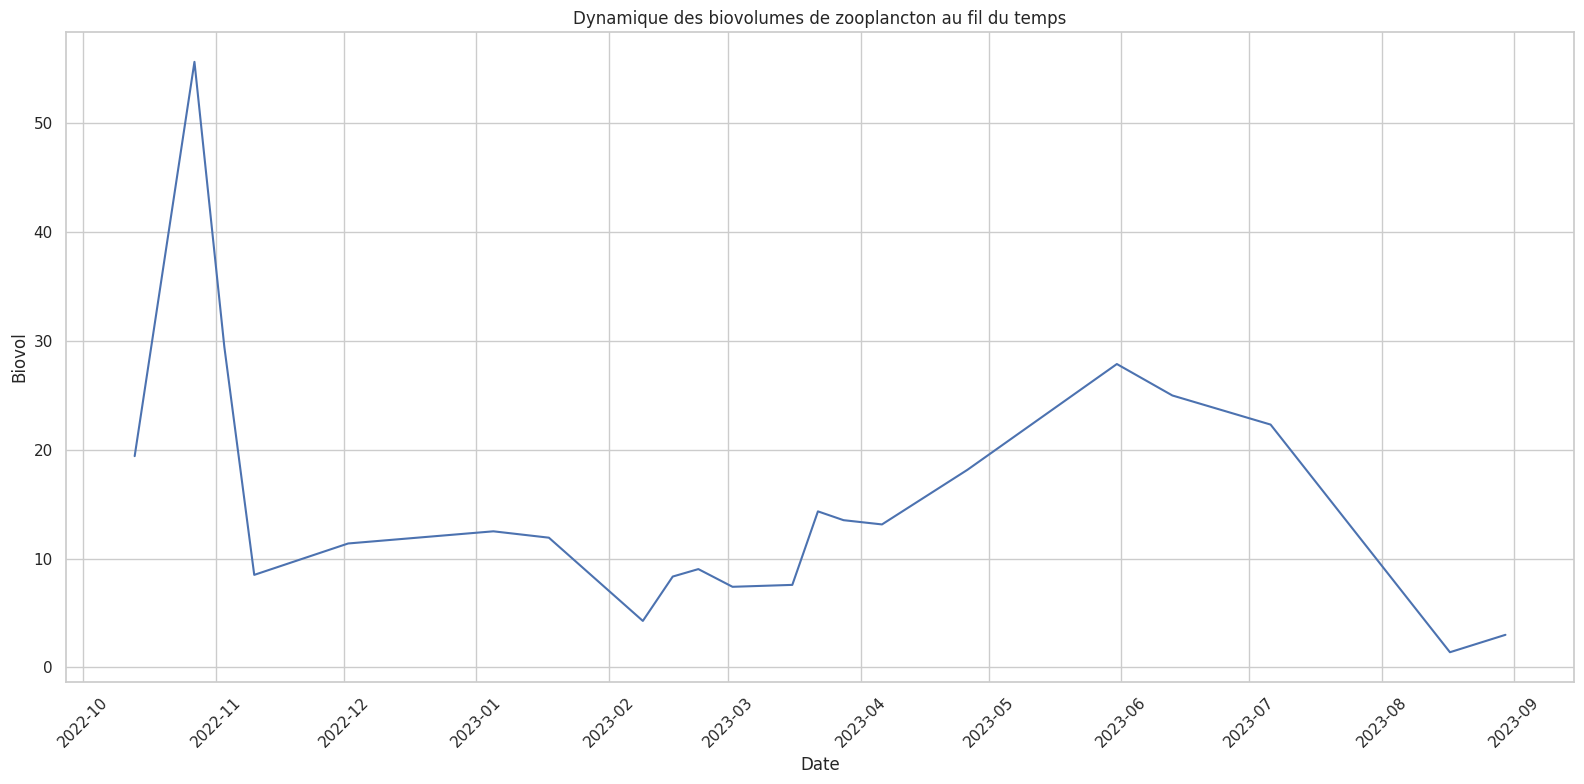

In [267]:
grouped_tot100_by_date = grouped_tot100.groupby('Date').agg({'Biovol': 'sum'}).reset_index()
plt.figure(figsize=(16, 8))
sns.lineplot(x='Date', y='Biovol', data=grouped_tot100_by_date)
plt.xticks(rotation=45)
plt.title('Dynamique des biovolumes de zooplancton au fil du temps')
plt.tight_layout()
plt.show()

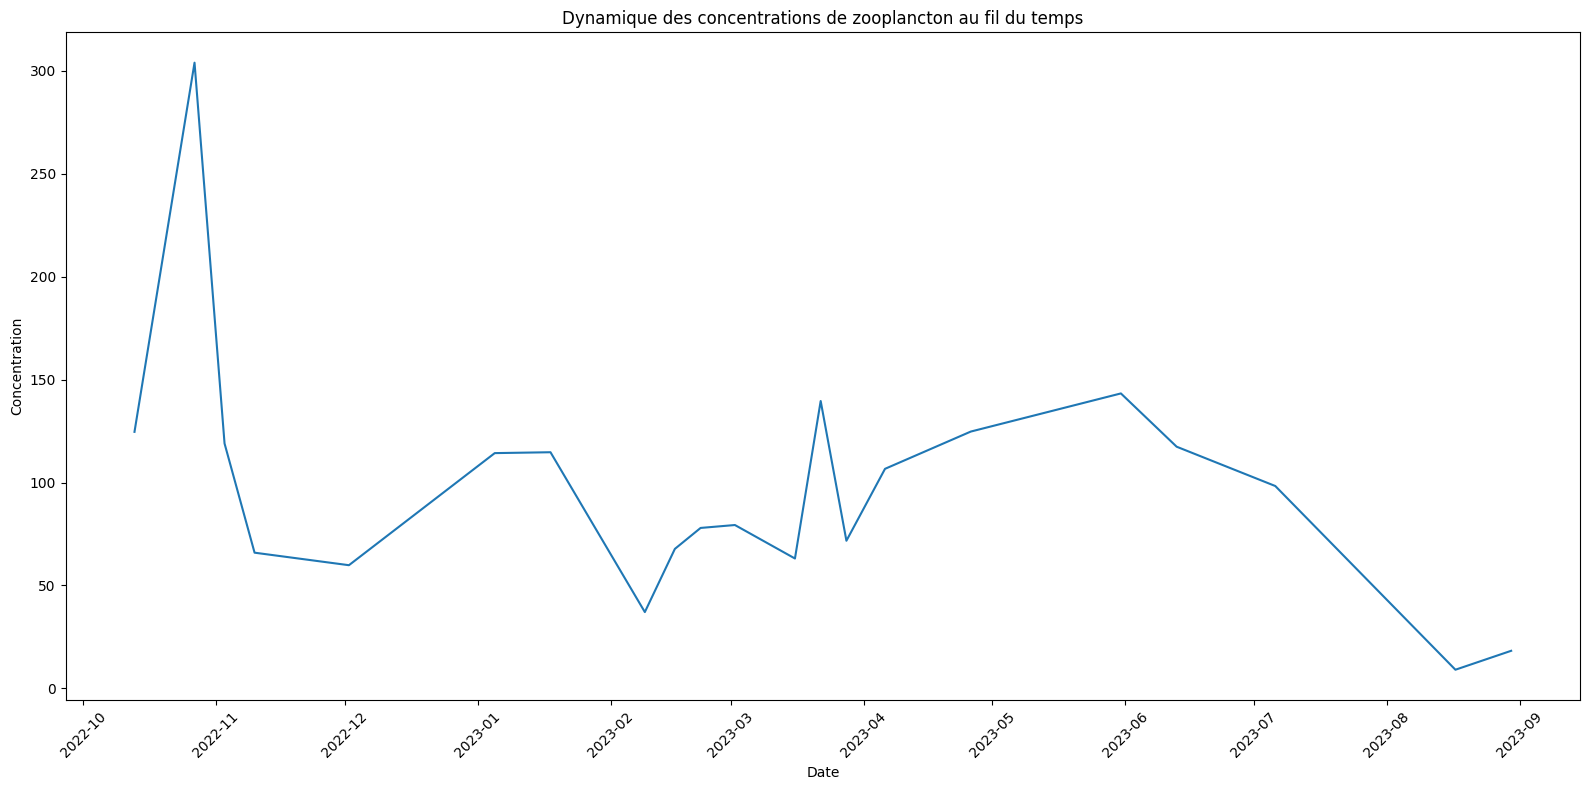

In [243]:
grouped_tot100_by_date = grouped_tot100.groupby('Date').agg({'Concentration': 'sum'}).reset_index()
plt.figure(figsize=(16, 8))
sns.lineplot(x='Date', y='Concentration', data=grouped_tot100_by_date)
plt.xticks(rotation=45)
plt.title('Dynamique des concentrations de zooplancton au fil du temps')
plt.tight_layout()
plt.show()

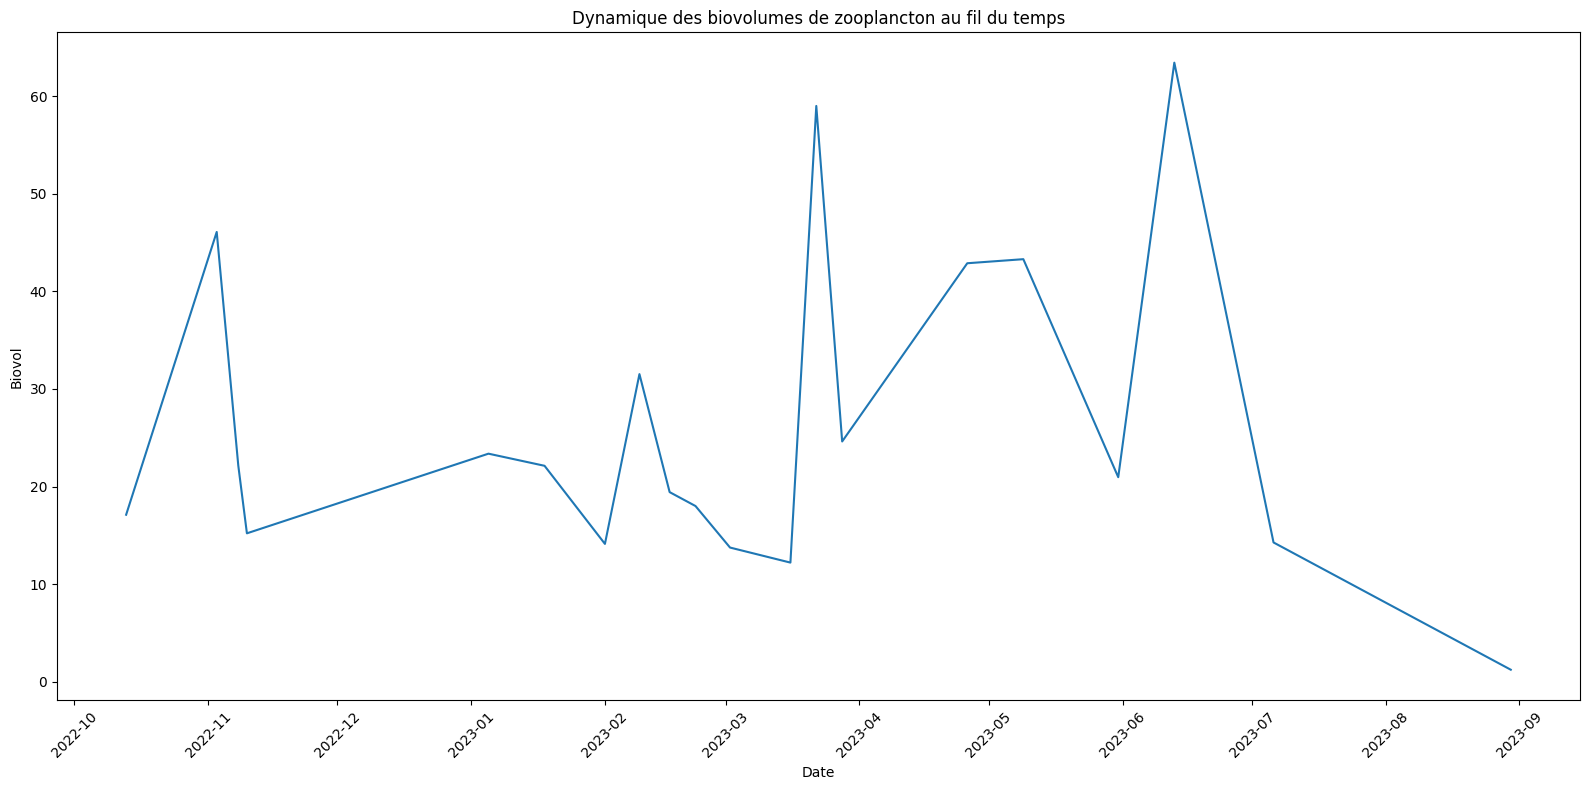

In [225]:
grouped_by_date = grouped_m50.groupby('Date').agg({'Biovol': 'sum'}).reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(x='Date', y='Biovol', data=grouped_by_date)
plt.xticks(rotation=45)
plt.title('Dynamique des biovolumes de zooplancton au fil du temps')
plt.tight_layout()
plt.show()

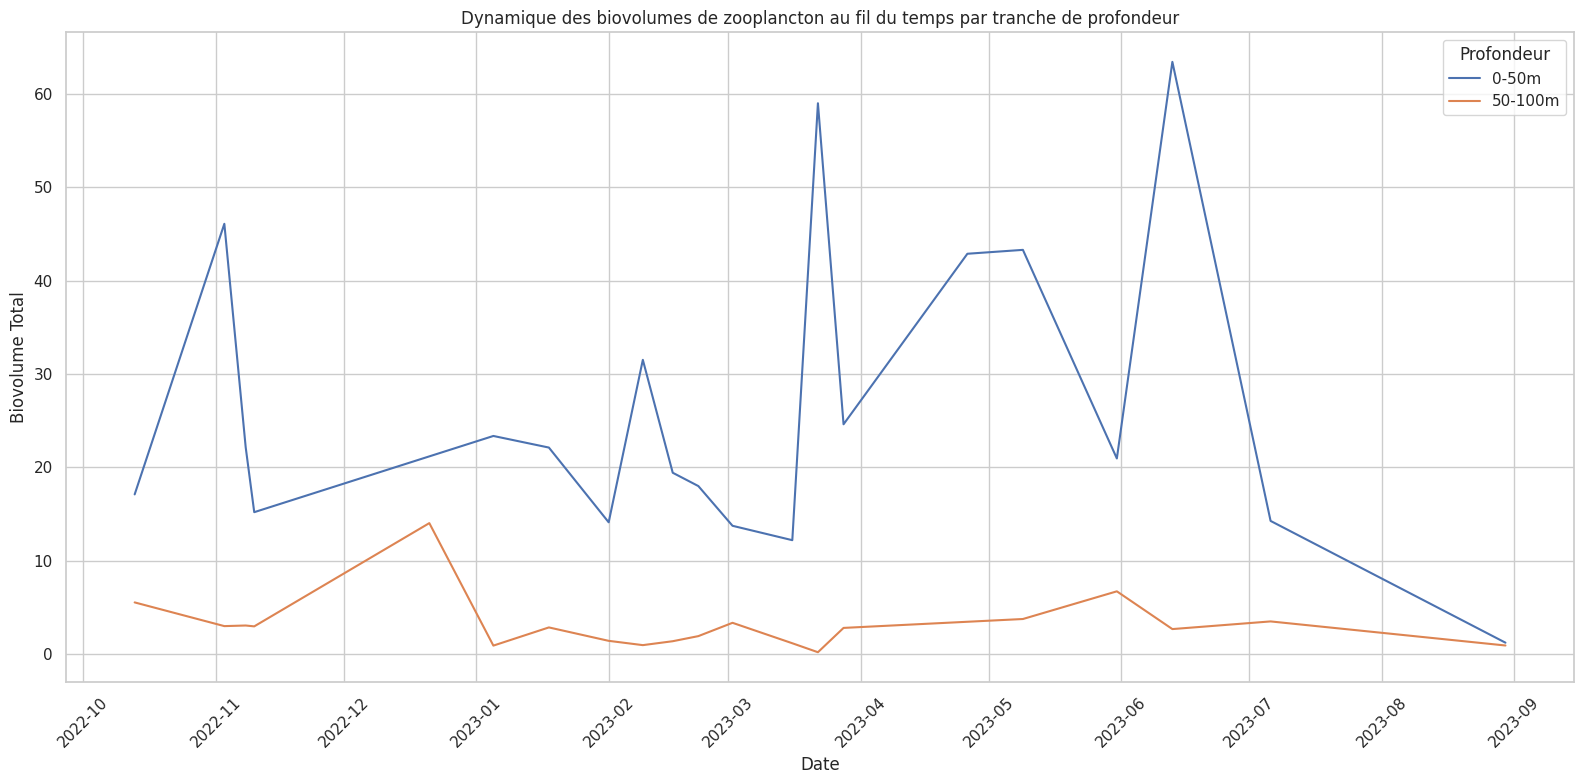

In [288]:
# Grouper les données par date pour les deux tranches de profondeur
grouped_m50_by_date = grouped_m50.groupby('Date').agg({'Biovol': 'sum'}).reset_index()
grouped_m100_by_date = grouped_m100.groupby('Date').agg({'Biovol': 'sum'}).reset_index()

# Créer le graphique
plt.figure(figsize=(16, 8))

# Tracer la ligne pour les échantillons de 0-50m
sns.lineplot(x='Date', y='Biovol', data=grouped_m50_by_date, label='0-50m')

# Tracer la ligne pour les échantillons de 50-100m
sns.lineplot(x='Date', y='Biovol', data=grouped_m100_by_date, label='50-100m')


# Personnalisation du graphique
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Biovolume Total')
plt.title('Dynamique des biovolumes de zooplancton au fil du temps par tranche de profondeur')
plt.legend(title='Profondeur')
plt.grid(True)

# Afficher le graphique
plt.tight_layout()
plt.show()


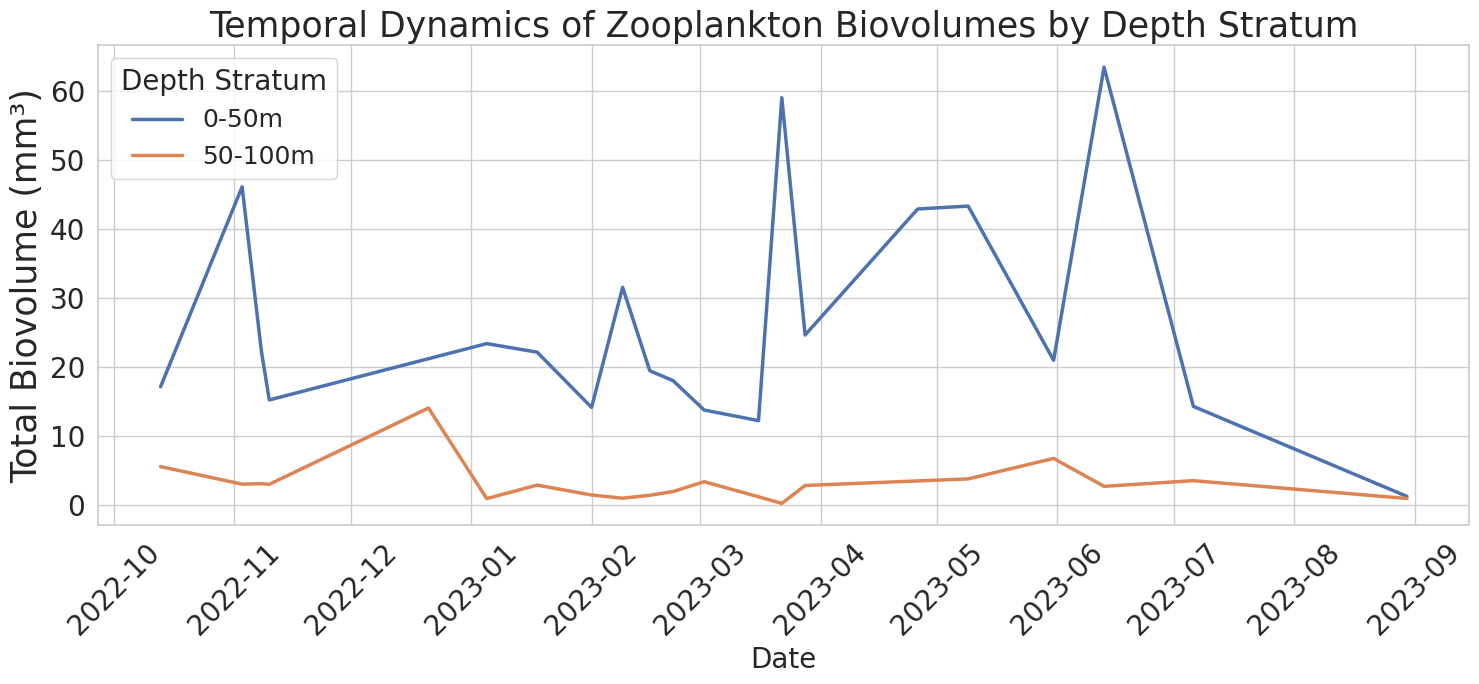

In [291]:
import seaborn as sns
import matplotlib.pyplot as plt

# Utilisation d'un style Seaborn
sns.set(style="whitegrid")

# Créer le graphique
plt.figure(figsize=(15, 7))

# Tracer la ligne pour les échantillons de 0-50m
sns.lineplot(x='Date', y='Biovol', data=grouped_m50_by_date, label='0-50m', linewidth=2.5)

# Tracer la ligne pour les échantillons de 50-100m
sns.lineplot(x='Date', y='Biovol', data=grouped_m100_by_date, label='50-100m', linewidth=2.5)

# Personnalisation du graphique
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Biovolume (mm³)', fontsize=25)
plt.title('Temporal Dynamics of Zooplankton Biovolumes by Depth Stratum', fontsize=25)

# Ajustement de la légende
plt.legend(title='Depth Stratum', title_fontsize='20', fontsize=18, loc='upper left')

# Ajout de grilles pour une meilleure lisibilité
plt.grid(True)

# Montrer le graphique
plt.tight_layout()
plt.show()


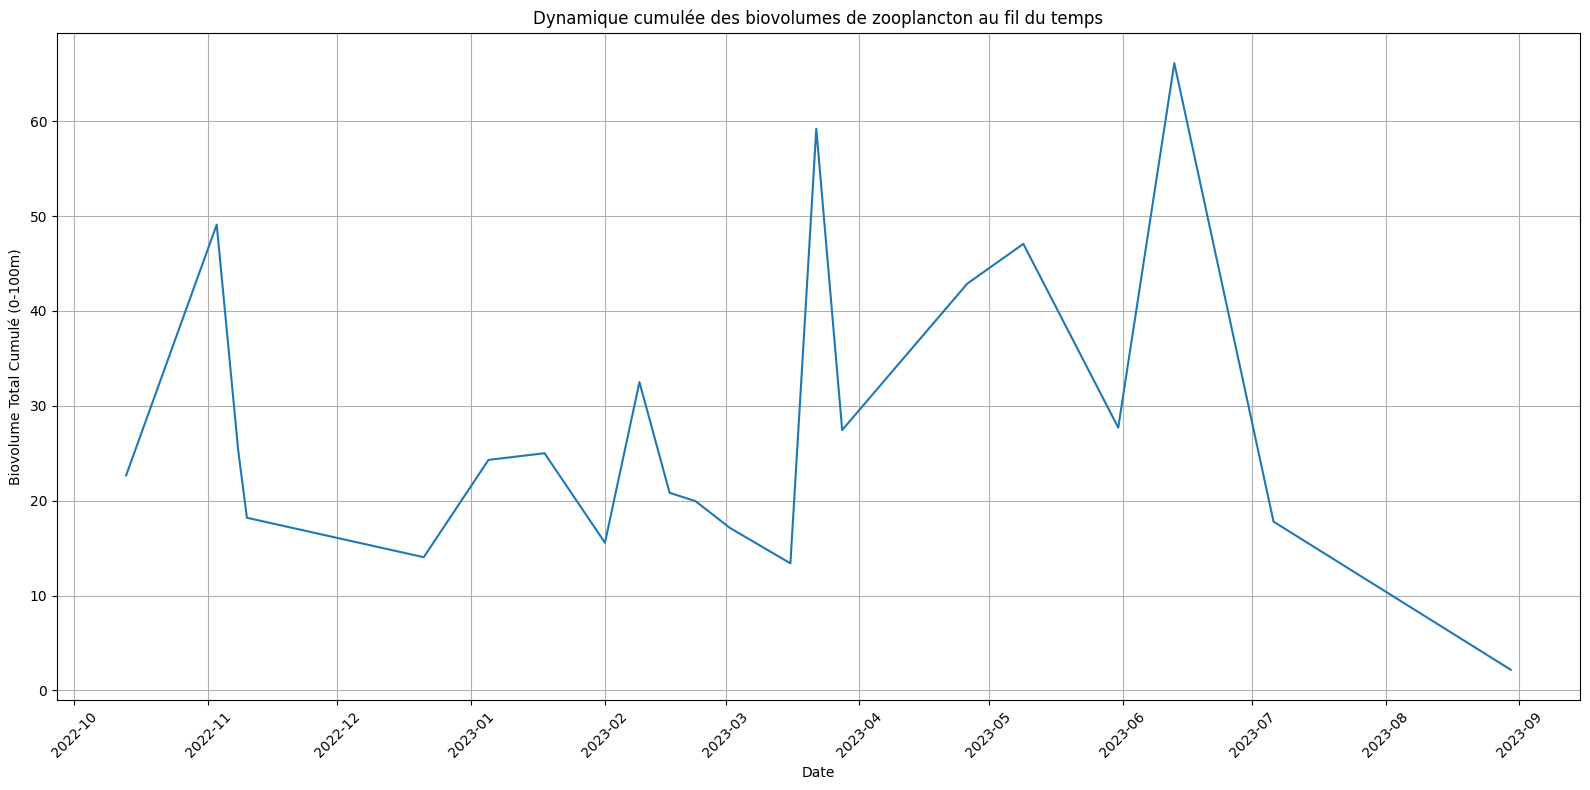

In [241]:
import pandas as pd

# Fusionner les deux DataFrames en utilisant la date comme clé
merged_by_date = pd.merge(grouped_m50_by_date, grouped_m100_by_date, on='Date', how='outer', suffixes=('_0_50', '_50_100'))

# Remplacer les valeurs NaN par 0 (au cas où certaines dates sont présentes dans une tranche de profondeur mais pas dans l'autre)
merged_by_date.fillna(0, inplace=True)

# Calculer la somme des biovolumes pour chaque date
merged_by_date['Biovol_total'] = merged_by_date['Biovol_0_50'] + merged_by_date['Biovol_50_100']

# Créer le graphique
plt.figure(figsize=(16, 8))

# Tracer la ligne pour la somme des biovolumes
sns.lineplot(x='Date', y='Biovol_total', data=merged_by_date)

# Personnalisation du graphique
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Biovolume Total Cumulé (0-100m)')
plt.title('Dynamique cumulée des biovolumes de zooplancton au fil du temps')
plt.grid(True)

# Afficher le graphique
plt.tight_layout()
plt.show()


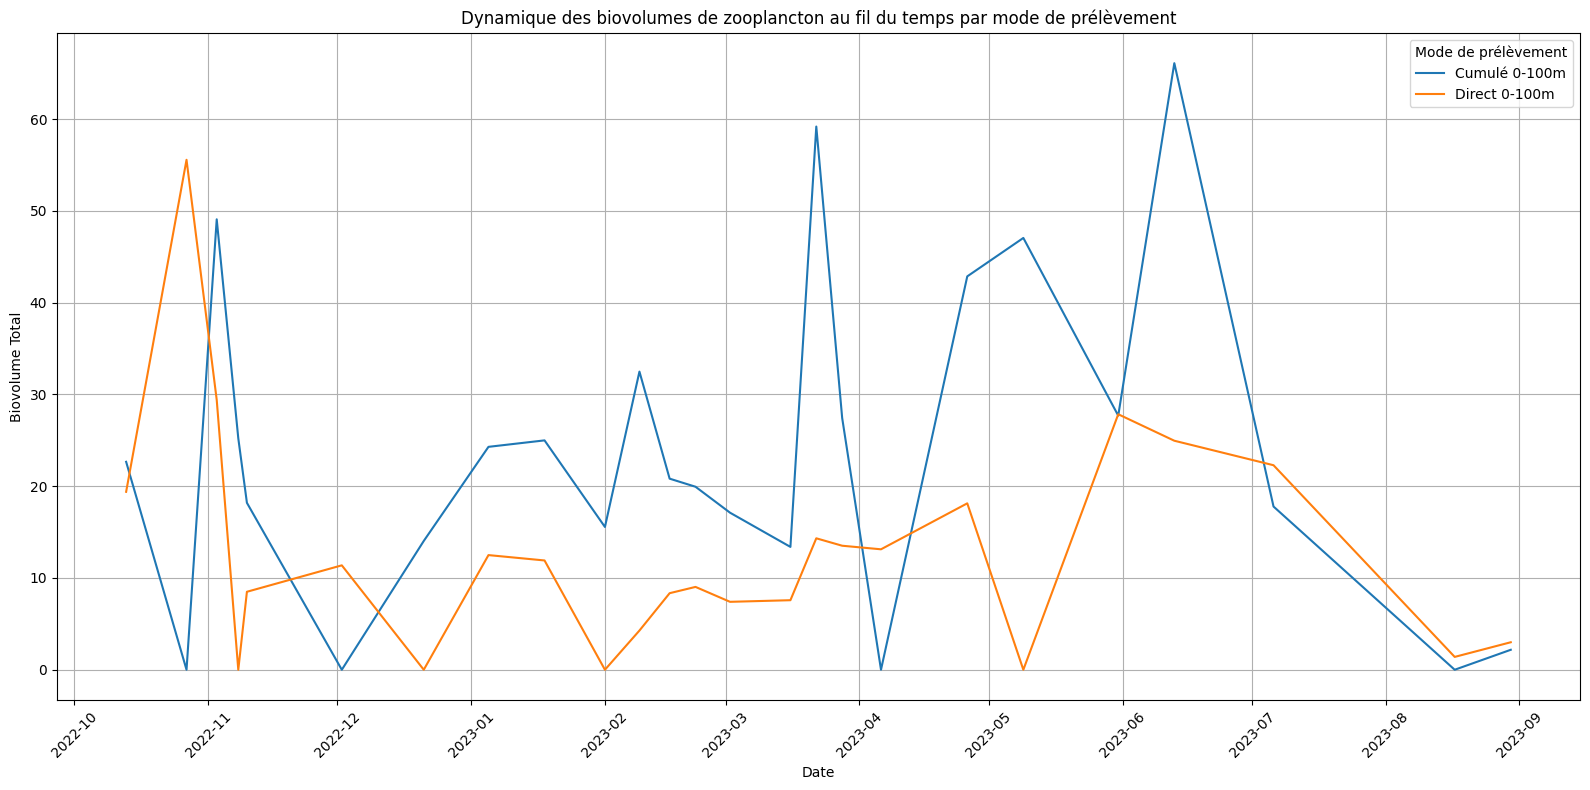

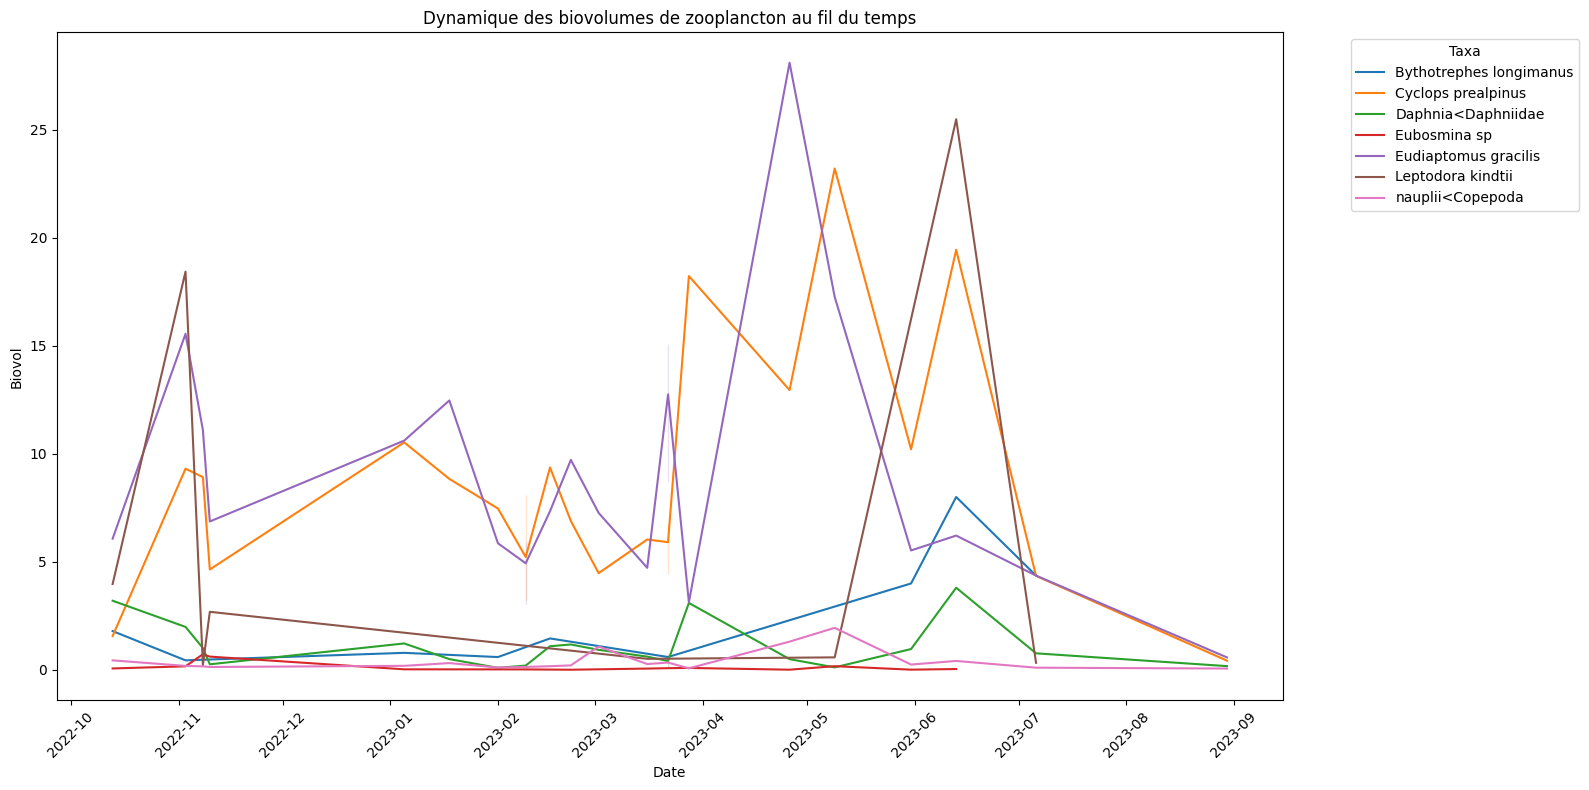

In [229]:


plt.figure(figsize=(16, 8))
sns.lineplot(x='Date', y='Biovol', hue='Taxa', data=grouped_m50)
plt.xticks(rotation=45)
plt.title('Dynamique des biovolumes de zooplancton au fil du temps')
plt.legend(title='Taxa', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


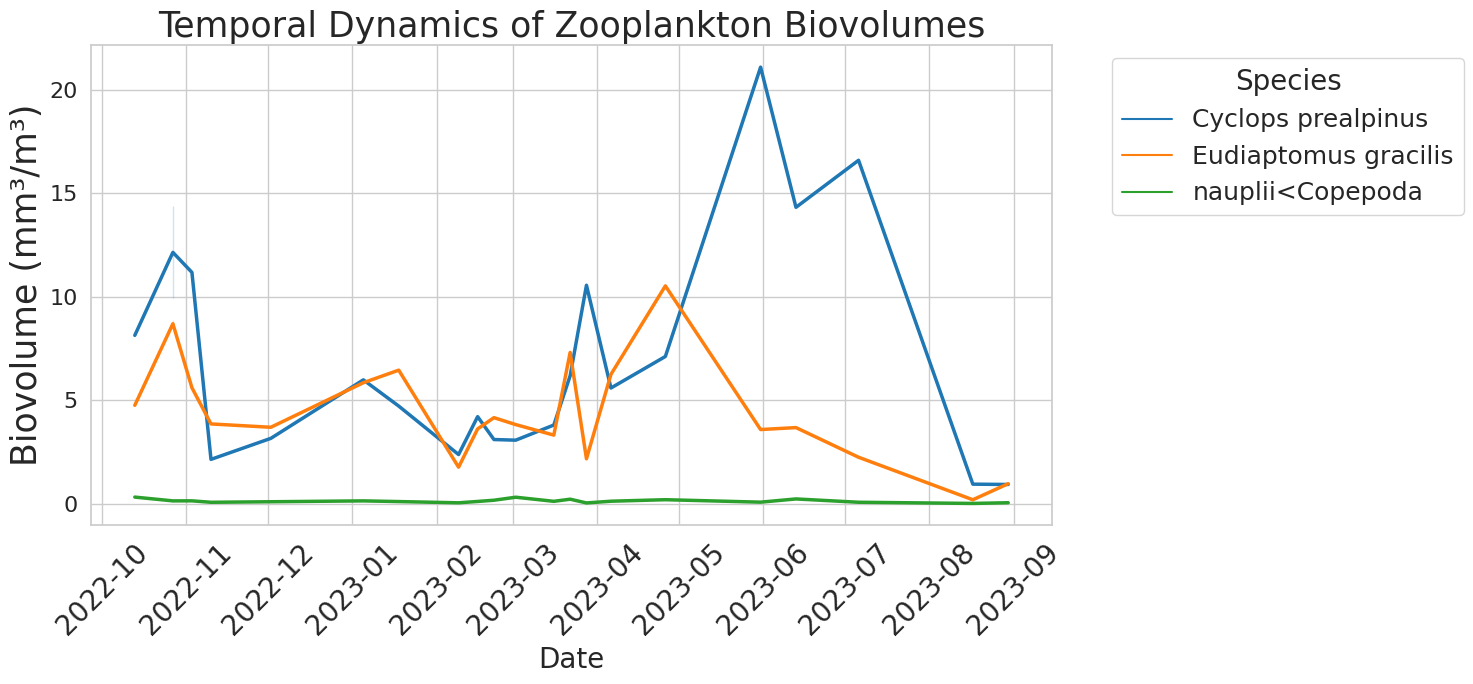

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt

# Utilisation d'un style Seaborn
sns.set(style="whitegrid")

# Filtrer les données pour inclure les taxons d'intérêt
filtered_grouped_tot100 = grouped_tot100.query('Taxa == "Cyclops prealpinus" or Taxa == "Eudiaptomus gracilis" or Taxa == "nauplii<Copepoda"')

# Créer le graphique
plt.figure(figsize=(15, 7))

# Tracer la ligne
sns.lineplot(x='Date', y='Biovol', hue='Taxa', palette="tab10", linewidth=2.5, data=filtered_grouped_tot100)

# Personnalisation du graphique
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Biovolume (mm³/m³)', fontsize=25)
plt.title('Temporal Dynamics of Zooplankton Biovolumes', fontsize=25)

# Ajustement de la légende
plt.legend(title='Species', title_fontsize='20', fontsize=18, bbox_to_anchor=(1.05, 1), loc='upper left')

# Montrer le graphique
plt.tight_layout()
plt.show()



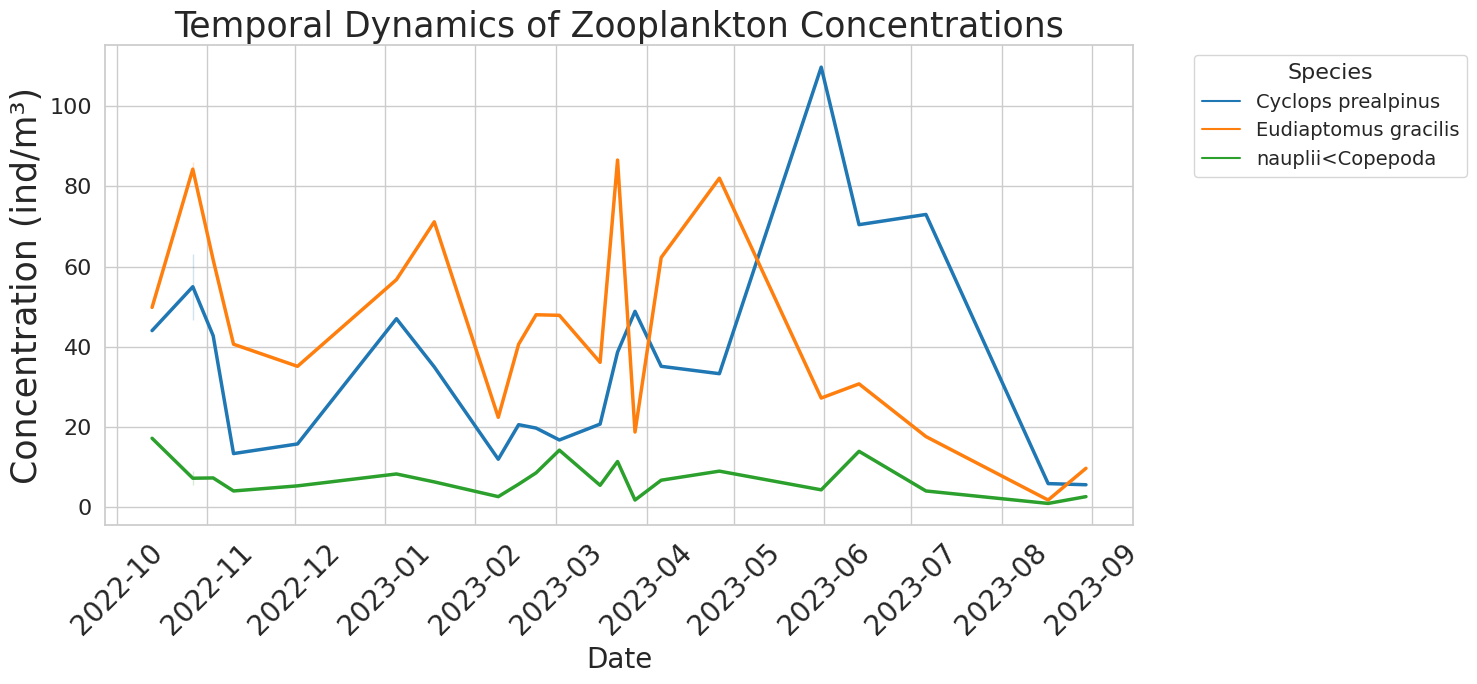

In [279]:
import seaborn as sns
import matplotlib.pyplot as plt

# Utilisation d'un style Seaborn
sns.set(style="whitegrid")

# Filtrer les données pour inclure les taxons d'intérêt
filtered_grouped_tot100 = grouped_tot100.query('Taxa == "Cyclops prealpinus" or Taxa == "Eudiaptomus gracilis" or Taxa == "nauplii<Copepoda"')

# Créer le graphique
plt.figure(figsize=(15, 7))

# Tracer la ligne
sns.lineplot(x='Date', y='Concentration', hue='Taxa', palette="tab10", linewidth=2.5, data=filtered_grouped_tot100)

# Personnalisation du graphique
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Concentration (ind/m³)', fontsize=25)
plt.title('Temporal Dynamics of Zooplankton Concentrations', fontsize=25)

# Ajustement de la légende
plt.legend(title='Species', title_fontsize='16', fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

# Montrer le graphique
plt.tight_layout()
plt.show()


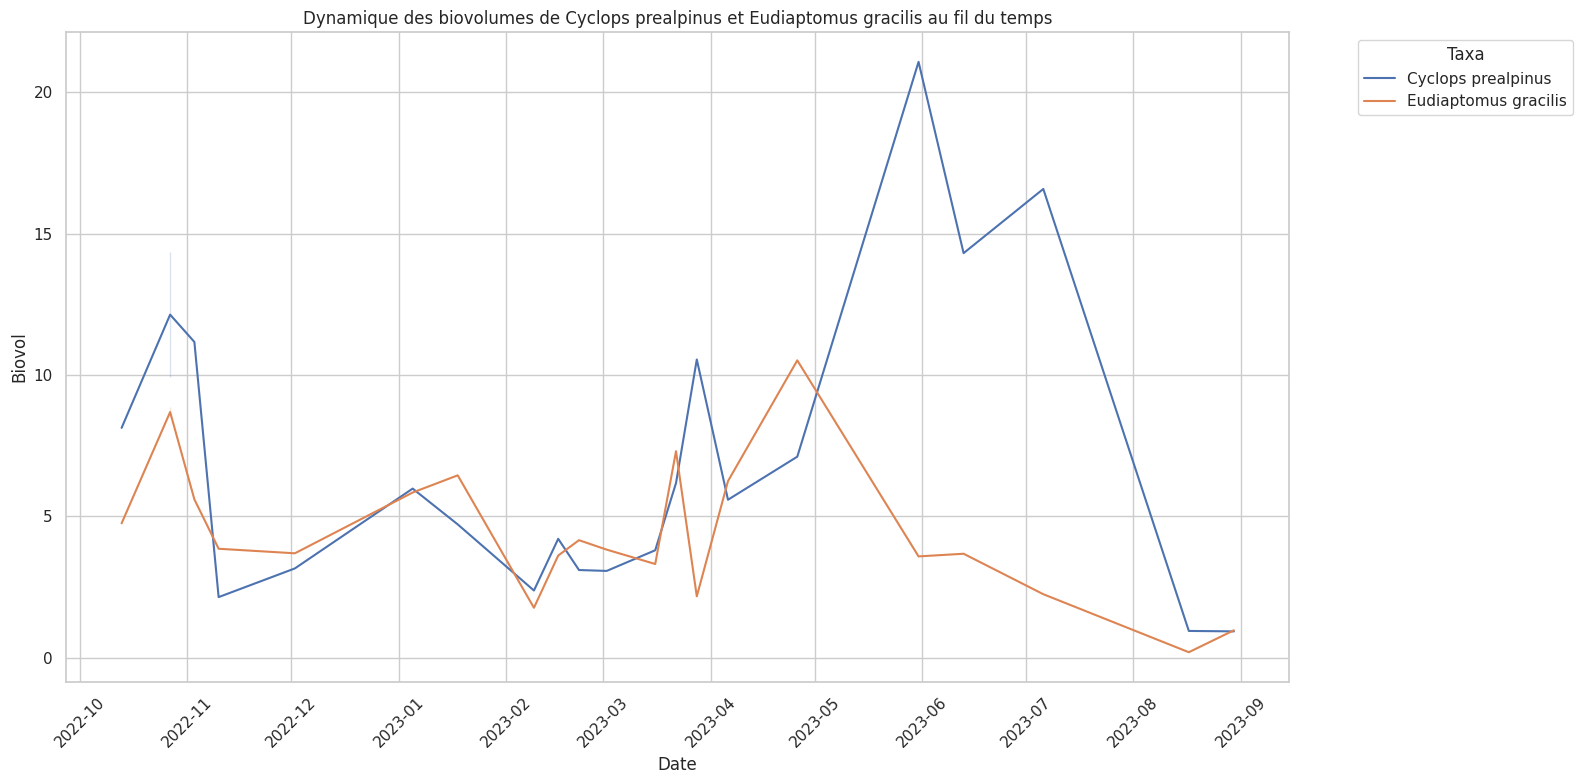

In [280]:
# Filtrer les données pour n'inclure que les deux taxons d'intérêt
filtered_grouped_tot100 = grouped_tot100.query('Taxa == "Cyclops prealpinus" or Taxa == "Eudiaptomus gracilis"')

# Créer le graphique
plt.figure(figsize=(16, 8))
sns.lineplot(x='Date', y='Biovol', hue='Taxa', data=filtered_grouped_tot100)
plt.xticks(rotation=45)
plt.title('Dynamique des biovolumes de Cyclops prealpinus et Eudiaptomus gracilis au fil du temps')
plt.legend(title='Taxa', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Stratif water column analysis

Exclude samples not needed yet

In [67]:
substrat = sub2[~sub2['acq_id'].isin(['tot_n10_221027', 'tot_n9_221013','tot_n11_221027', 'tot_n14_221103',
                                           'tot_n19_221110','tot_n20_221202', 'tot_n24_221221', 'tot_n25_221221',
                                           'tot_n26_221221', 'tot_n27_221221', 'tot_n28_221221',
                                           'tot_n29_221221','tot_n32_230105','tot_n35_230118',
                                          'tot_n38_230209','tot_n41_230209','tot_n42_230209',
                                          'tot_n43_230216','tot_n46_230222','tot_49_230302',
                                          'tot_n53_230316','tot_n56_230322','tot_n61_230328','tot_n64_230406',
                                          'tot_n65_230426','tot_n70_230531','tot_n73_230613','tot_n76_230706'
                                          'tot_n79_230817','tot_n80_230830'])].copy()

Date format

In [68]:
substrat['Date'] = pd.to_datetime(substrat['Date'], format='%Y%m%d')

Conversions from pixel to mm

In [69]:
# Conversions from pixel to mm
substrat['Area_mm2'] = substrat['area'] * ((substrat['pixel_size_mm']) ** 2)
substrat['AreaExc_mm2'] = substrat['areaExc'] * ((substrat['pixel_size_mm']) ** 2)
substrat['Major_mm'] = substrat['major'] * substrat['pixel_size_mm']
substrat['Minor_mm'] = substrat['minor'] * substrat['pixel_size_mm']

Ellipsoidal Volume = V (mm3) = 4/3 x ∏ x [ (Major(mm)/2) x (Minor(mm)/2) x (Minor(mm)/2) ]

In [70]:
substrat['V_mm3'] = (4 / 3) * np.pi * ((substrat['Major_mm'] / 2) * (substrat['Minor_mm'] / 2) * (substrat['Minor_mm'] / 2))

In [71]:
print(substrat)

                     Label       Date  Min_depth  Max_depth  \
4174    n12_221103_tot_1_1 2022-11-03       50.0      100.0   
4180    n12_221103_tot_1_7 2022-11-03       50.0      100.0   
4182    n12_221103_tot_1_9 2022-11-03       50.0      100.0   
4184   n12_221103_tot_1_11 2022-11-03       50.0      100.0   
4185   n12_221103_tot_1_12 2022-11-03       50.0      100.0   
...                    ...        ...        ...        ...   
52866  n8_221013_tot_1_641 2022-10-13        0.0       50.0   
52867  n8_221013_tot_1_642 2022-10-13        0.0       50.0   
52868  n8_221013_tot_1_643 2022-10-13        0.0       50.0   
52871  n8_221013_tot_1_646 2022-10-13        0.0       50.0   
52872  n8_221013_tot_1_647 2022-10-13        0.0       50.0   

                       Taxa     area  areaExc  major  minor  Tow_Vol  \
4174     Cyclops prealpinus   3386.0   3384.0   91.8   46.9   3.5343   
4180     Cyclops prealpinus  10219.0  10130.0  154.5   84.2   3.5343   
4182     Cyclops prealpinus

In [46]:
substrat.to_excel('stratif.xlsx', index=False)

Creates a factor which allows binning by the log of the biovolume

In [52]:
substrat['logvol'] = np.log10(substrat['V_mm3'])

Create groups based on acq_id, taxa and date

In [72]:
grouped_data = substrat.groupby(['acq_id', 'Taxa', 'Date'])

In [73]:
print(grouped_data)

In [74]:
species_count_data = grouped_data.agg({'Taxa': 'count', 'Tow_Vol': 'mean'}).rename(columns={'Taxa': 'Count', 'Tow_Vol': 'tv'})

In [79]:
species_count_data.to_excel('species_count_data.xlsx', index=False)

In [78]:
print(species_count_data)

                                                Count      tv
acq_id         Taxa                 Date                     
tot_n12_221103 Cyclops prealpinus   2022-11-03     32  3.5343
               Daphnia<Daphniidae   2022-11-03      1  3.5343
               Eubosmina sp         2022-11-03      6  3.5343
               Eudiaptomus gracilis 2022-11-03      5  3.5343
               nauplii<Copepoda     2022-11-03      1  3.5343
...                                               ...     ...
tot_n8_221013  Daphnia<Daphniidae   2022-10-13     75  3.5343
               Eubosmina sp         2022-10-13      4  3.5343
               Eudiaptomus gracilis 2022-10-13    228  3.5343
               Leptodora kindtii    2022-10-13      1  3.5343
               nauplii<Copepoda     2022-10-13     79  3.5343

[267 rows x 2 columns]


In [80]:
concentration_data = species_count_data.copy()
concentration_data['Concentration'] = concentration_data['Count'] / concentration_data['tv']
concentration_data.reset_index(inplace=True)

In [ ]:
print(concentration_data)

In [82]:
concentration_data.to_excel('conc.xlsx', index=False)

In [95]:
biovolume_data = substrat.groupby(['Taxa', 'Date']).agg({'Tow_Vol': 'mean', 'V_mm3': 'sum'})
biovolume_data['Biovolume'] = biovolume_data['V_mm3'] / biovolume_data['Tow_Vol']
biovolume_data.reset_index(inplace=True)

concentration_data = concentration_data.merge(biovolume_data[['Taxa', 'Date','Biovolume']], on=['Taxa', 'Date'])

In [60]:
biovolume_data.to_excel('biovol.xlsx', index=False)

Total biovolume and concentration by sample

In [96]:
total_conc = concentration_data.groupby('acq_id').agg({'Count': 'sum', 'Concentration': 'sum', 'Biovolume': 'sum','Date': 'first'}).reset_index()

In [ ]:
print(total_conc)

            acq_id  Count  Concentration  Biovolume       Date
0    tot_49_230302    561      79.365079  22.290681 2023-03-02
1   tot_n11_221027   1113     157.456922  28.935765 2022-10-27
2   tot_n12_221103     45      12.732366  30.215413 2022-11-03
3   tot_n13_221103    839     237.387884  49.091389 2022-11-03
4   tot_n15_221108     64      18.108253  25.005606 2022-11-08
..             ...    ...            ...        ...        ...
59   tot_n7_221013     92      26.030614  16.891743 2022-10-13
60  tot_n80_230830    129      18.249724   4.779705 2023-08-30
61  tot_n81_230830     30       8.488244   3.758116 2023-08-30
62  tot_n82_230830     42      11.883541   3.758116 2023-08-30
63   tot_n8_221013    448     126.757774  22.662089 2022-10-13

[64 rows x 5 columns]


In [97]:
# Group the data by date and sum the values
total_conc = total_conc.groupby('Date').sum().reset_index()



<ipython-input-97-5ebf0b2ab91d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


In [98]:
cyclopsEudia = ["Cyclops prealpinus","Eudiaptomus gracilis","nauplii<Copepoda"]
concentration_data_cyclops = concentration_data.query('Taxa in @cyclopsEudia')

DaphEubos = ["Daphnia<Daphniidae","Eubosmina sp"]
concentration_data_daph = concentration_data.query('Taxa in @DaphEubos')

LeptoBitho = ["Leptodora kindtii","Bythotrephes longimanus",]
concentration_data_lepto = concentration_data.query('Taxa in @LeptoBitho')

In [99]:
grouped_conc_data = concentration_data.groupby(['Taxa', 'Date'])['Concentration'].sum().reset_index()

In [100]:
group_cyclopsEudia = ["Cyclops prealpinus","Eudiaptomus gracilis","nauplii<Copepoda"]
grouped_data_cyclops = grouped_conc_data.query('Taxa in @group_cyclopsEudia')

group_dapheubo = ["Daphnia<Daphniidae","Eubosmina sp"]
grouped_data_dapheubo = grouped_conc_data.query('Taxa in @group_dapheubo')

group_leptobitho = ["Leptodora kindtii","Bythotrephes longimanus"]
grouped_data_leptobitho = grouped_conc_data.query('Taxa in @group_leptobitho')

### Plots

Total concentration plot

<ipython-input-101-c5cfbf618ab3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



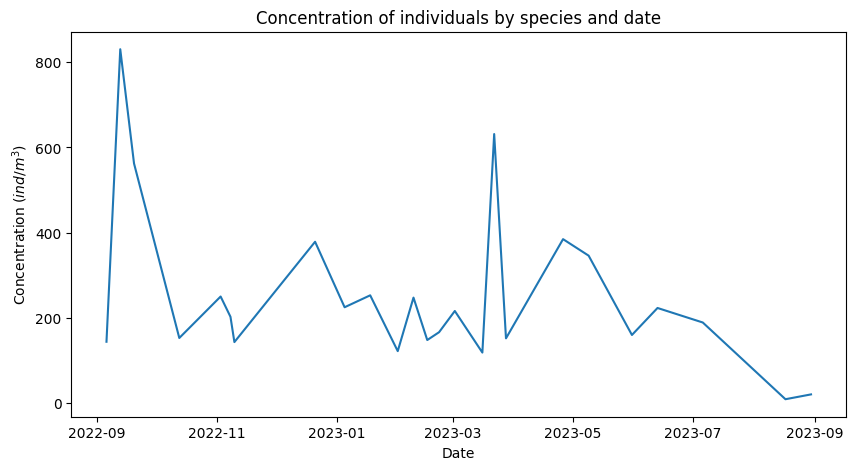

In [101]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Date", y="Concentration", data=total_conc, markers=True, ci=None)
plt.title("Concentration of individuals by species and date")
plt.xlabel("Date")
plt.ylabel("Concentration ($ind/m^3$)")
plt.show()

<ipython-input-102-b4933afaa4de>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

<ipython-input-102-b4933afaa4de>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



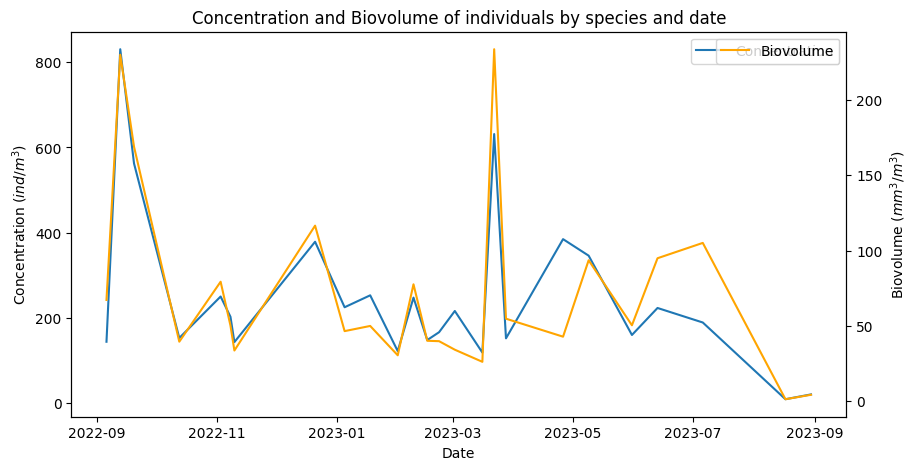

In [102]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# plot the first variable (Concentration) on the left y-axis
sns.lineplot(x="Date", y="Concentration", data=total_conc, markers=True, ax=ax1, ci=None, label = "Concentration")
ax1.set_xlabel('Date')
ax1.set_ylabel('Concentration ($ind/m^3$)')


ax2 = ax1.twinx()


sns.lineplot(x="Date", y="Biovolume", data=total_conc, markers=True, ax=ax2, color='orange', ci=None, label = "Biovolume")
ax2.set_ylabel('Biovolume ($mm^3/m^3$)')

plt.title("Concentration and Biovolume of individuals by species and date")
plt.legend()
plt.show()







Concentration by taxa

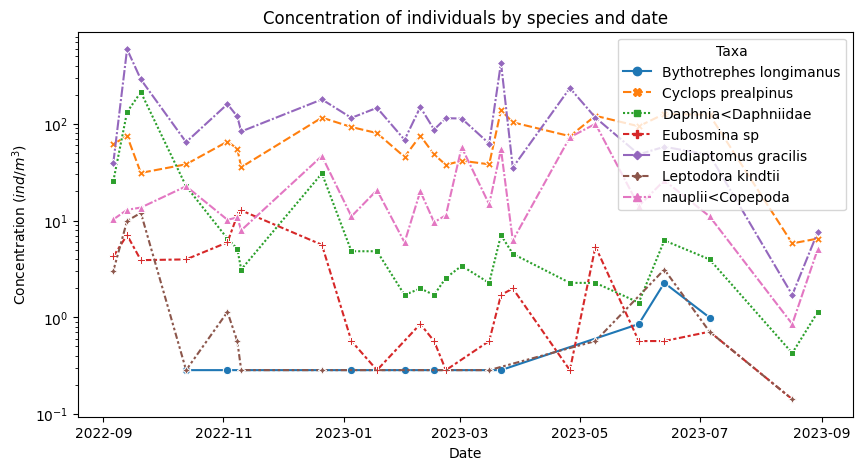

In [103]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Date", y="Concentration", hue="Taxa", data=grouped_conc_data, style="Taxa", markers=True)
plt.yscale("log") # add logarithmic scale
plt.title("Concentration of individuals by species and date")
plt.xlabel("Date")
plt.ylabel("Concentration ($ind/m^3$)")
plt.show()

Biovolume for Cyclops, eudiaptomus and nauplii

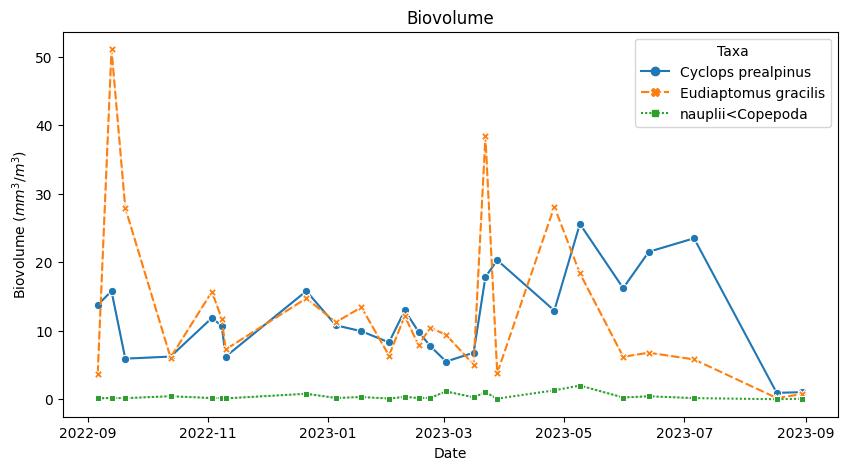

In [104]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Date", y="Biovolume", hue="Taxa", data=concentration_data_cyclops, style="Taxa", markers=True)
#plt.yscale("log") # add logarithmic scale
plt.title("Biovolume")
plt.xlabel("Date")
plt.ylabel("Biovolume ($mm^3$/$m^3$)")
plt.show()

Concentration for cyclops, eudiaptomus and nauplii

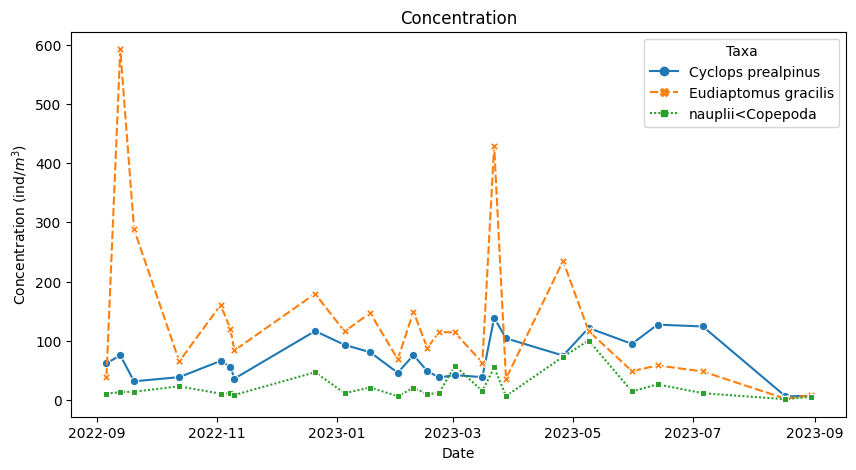

In [105]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Date", y="Concentration", hue="Taxa", data=grouped_data_cyclops, style="Taxa", markers=True)
#plt.yscale("log") # add logarithmic scale
plt.title("Concentration")
plt.xlabel("Date")
plt.ylabel("Concentration (ind/$m^3$)")
plt.show()

Biovolume for daphnia and eubosmina

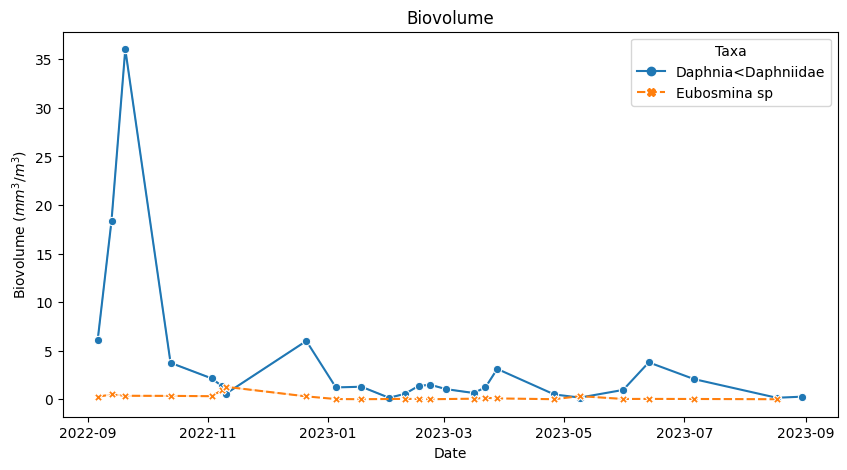

In [106]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Date", y="Biovolume", hue="Taxa", data=concentration_data_daph, style="Taxa", markers=True)
#plt.yscale("log") # add logarithmic scale
plt.title("Biovolume")
plt.xlabel("Date")
plt.ylabel("Biovolume ($mm^3$/$m^3$)")
plt.show()

Concentration for daphnia and eubosmina

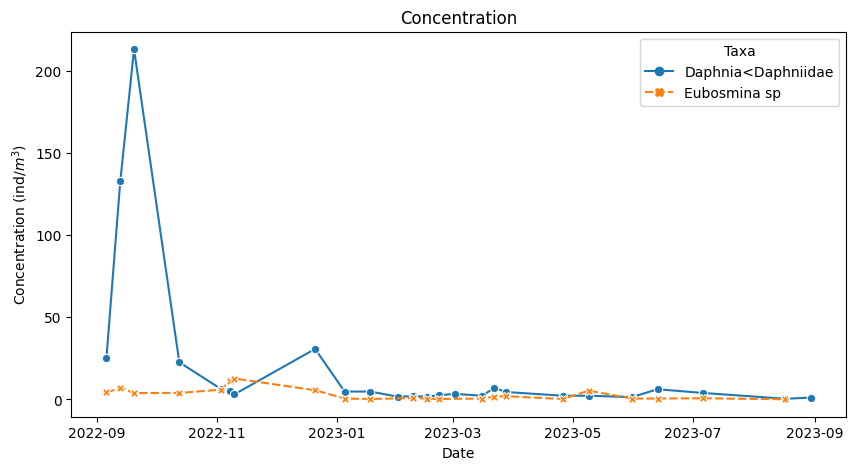

In [107]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Date", y="Concentration", hue="Taxa", data=grouped_data_dapheubo, style="Taxa", markers=True)
#plt.yscale("log") # add logarithmic scale
plt.title("Concentration")
plt.xlabel("Date")
plt.ylabel("Concentration (ind/$m^3$)")
plt.show()

Biovolume for bythotrephes and leptodora

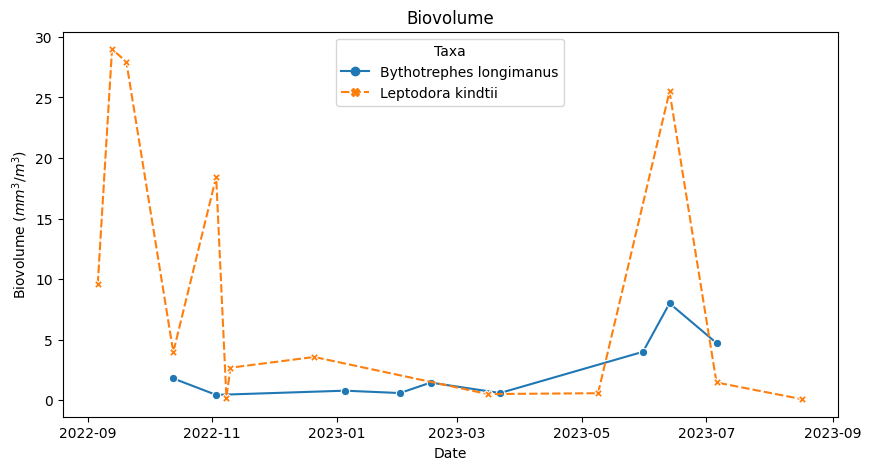

In [108]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Date", y="Biovolume", hue="Taxa", data=concentration_data_lepto, style="Taxa", markers=True)
#plt.yscale("log") # add logarithmic scale
plt.title("Biovolume")
plt.xlabel("Date")
plt.ylabel("Biovolume ($mm^3$/$m^3$)")
plt.show()

Concentration for bythotrephes and leptodora

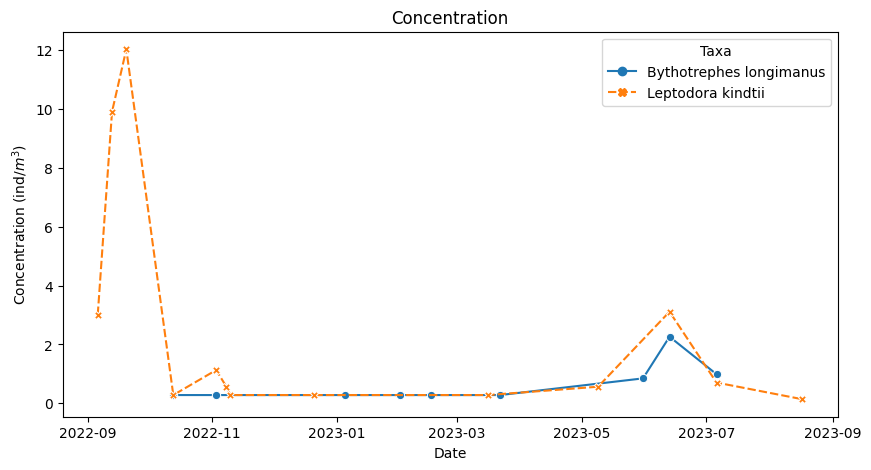

In [109]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Date", y="Concentration", hue="Taxa", data=grouped_data_leptobitho, style="Taxa", markers=True)
#plt.yscale("log") # add logarithmic scale
plt.title("Concentration")
plt.xlabel("Date")
plt.ylabel("Concentration (ind/$m^3$)")
plt.show()

In [110]:
species_to_plot = ["cyclops préalpinus", "eudiaptomus gracilis"]
concentration_data_filtered = concentration_data.query('Taxa in @species_to_plot')

In [111]:
grouped_conc_data = grouped_conc_data.sort_values(by='Date')

In [112]:
grouped_conc_data['Date'] = grouped_conc_data['Date'].dt.date

<ipython-input-113-8916f74b498e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



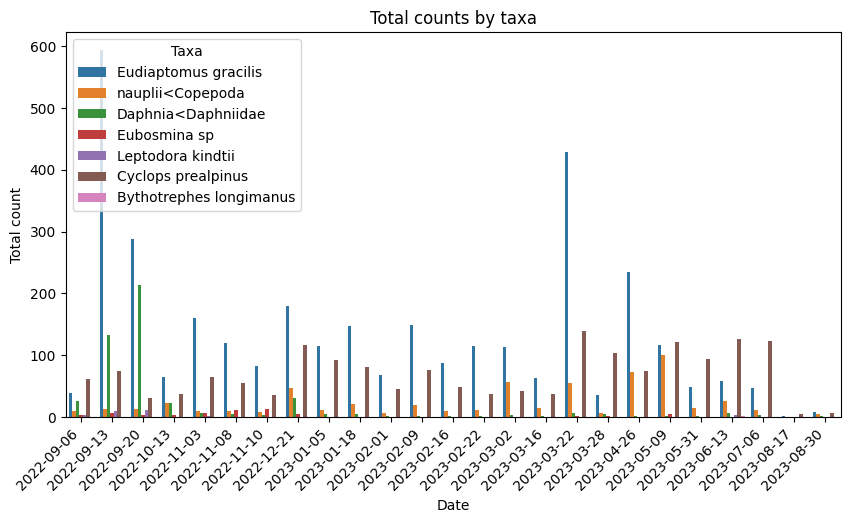

In [113]:
plt.figure(figsize=(10,5))
sns.barplot(x="Date", y="Concentration",hue="Taxa", data=grouped_conc_data, ci=None)
plt.title("Total counts by taxa")
plt.xlabel("Date")
plt.ylabel("Total count")
plt.xticks(rotation=45, ha='right')
plt.show()

In [114]:
concentration_data = concentration_data.sort_values(by='Date')



<Figure size 1000x500 with 0 Axes>

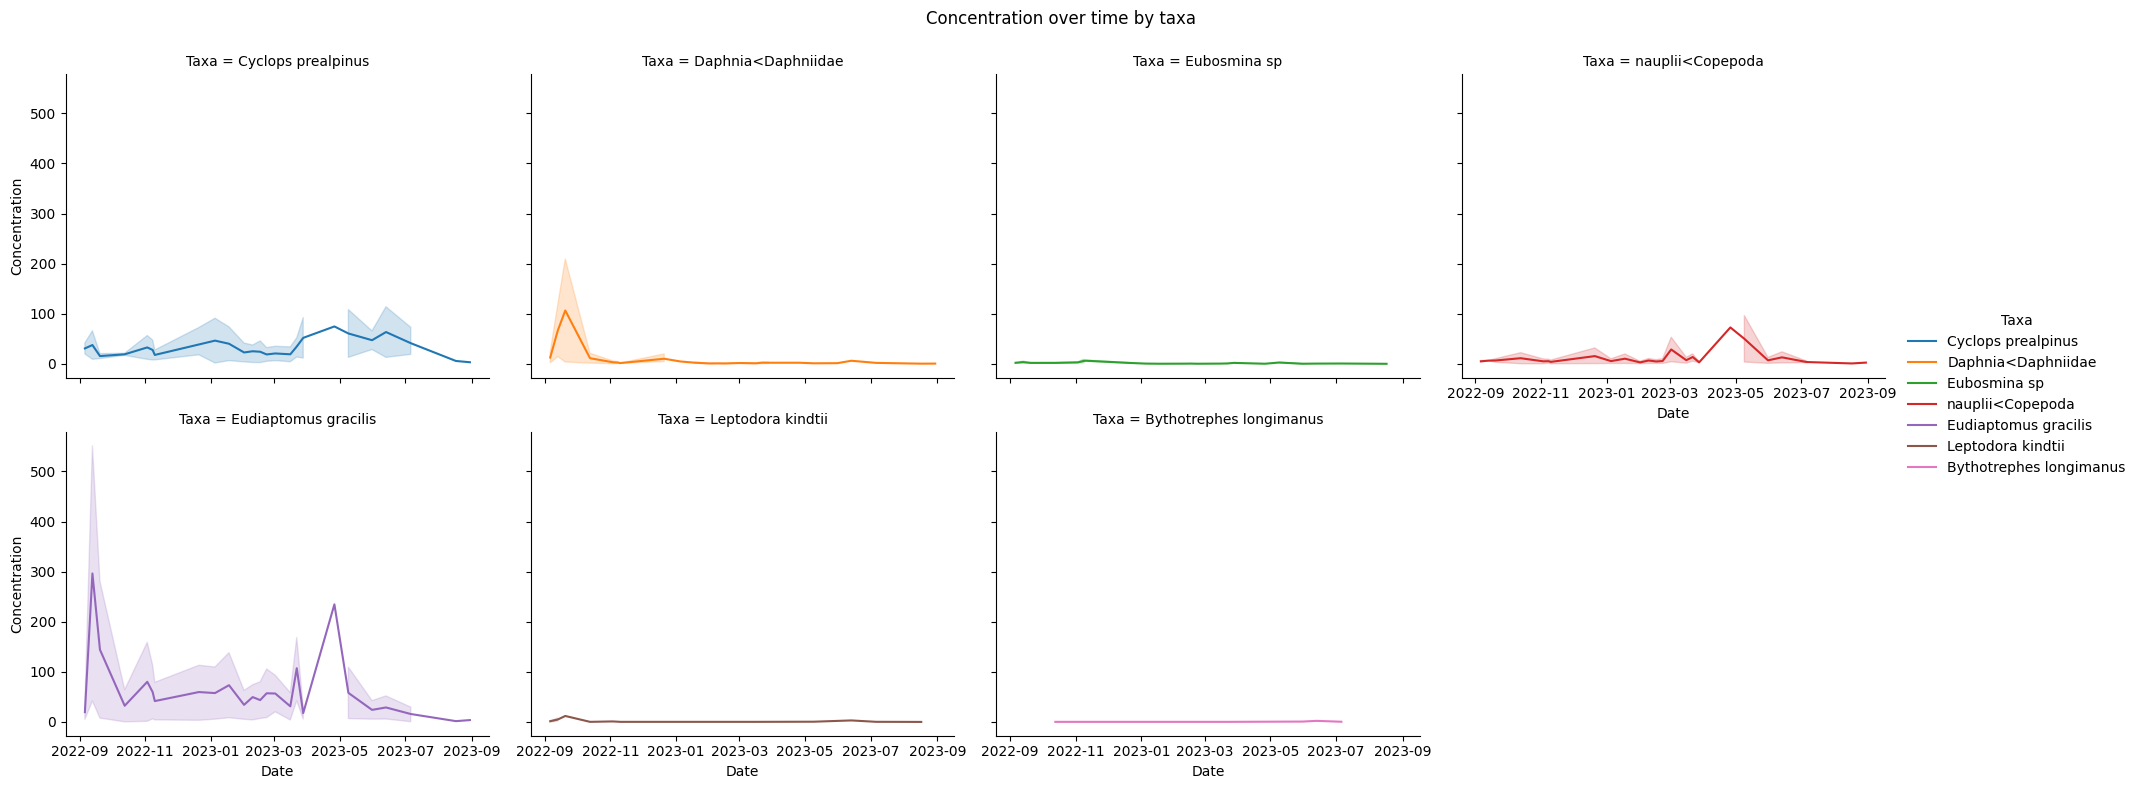

In [115]:
plt.figure(figsize=(10,5))
sns.relplot(x="Date", y="Concentration", hue="Taxa", kind="line", col="Taxa", col_wrap=4, data=concentration_data, height=4, aspect=1.2)
plt.subplots_adjust(top=0.9)
plt.suptitle("Concentration over time by taxa")
plt.show()

## 100-0 water column analysis

In [116]:
sub100 = sub2[sub2['acq_id'].isin(['tot_n10_221027', 'tot_n9_221013', 'tot_n14_221103',
                                           'tot_n19_221110', 'tot_n20_221221','tot_n32_230105','tot_n35_230118',
                                          'tot_n38_230209',
                                          'tot_n43_230216','tot_n46_230222','tot_n49_230303 ','tot_n53_230316', 'tot_n56_230322','tot_n61_230328','tot_n64_230406','tot_n65_230426',
                                   'tot_n70_230531','tot_n73_230613','tot_n76_230216','tot_n79_230817','tot_n80_230830'])].copy()

In [117]:
print(sub100)

                      Label      Date  Min_depth  Max_depth  \
669      n10_221027_tot_1_1  20221027        0.0      100.0   
670      n10_221027_tot_1_2  20221027        0.0      100.0   
671      n10_221027_tot_1_3  20221027        0.0      100.0   
672      n10_221027_tot_1_4  20221027        0.0      100.0   
673      n10_221027_tot_1_5  20221027        0.0      100.0   
...                     ...       ...        ...        ...   
54333  n9_221013_tot_1_1461  20221013        0.0      100.0   
54334  n9_221013_tot_1_1462  20221013        0.0      100.0   
54335  n9_221013_tot_1_1463  20221013        0.0      100.0   
54339  n9_221013_tot_1_1467  20221013        0.0      100.0   
54340  n9_221013_tot_1_1468  20221013        0.0      100.0   

                       Taxa    area  areaExc  major  minor  Tow_Vol  \
669    Eudiaptomus gracilis  4241.0   4240.0   77.1   70.1   7.0686   
670    Eudiaptomus gracilis  4203.0   4044.0  113.8   47.0   7.0686   
671    Eudiaptomus gracilis  3

In [118]:
sub100['Date'] = pd.to_datetime(sub100['Date'], format='%Y%m%d')

In [119]:
sub100['Area_mm2'] = sub100['area'] * ((sub100['pixel_size_mm']) ** 2)
sub100['AreaExc_mm2'] = sub100['areaExc'] * ((sub100['pixel_size_mm']) ** 2)
sub100['Major_mm'] = sub100['major'] * sub100['pixel_size_mm']
sub100['Minor_mm'] = sub100['minor'] * sub100['pixel_size_mm']

In [120]:
sub100['V_mm3'] = (4 / 3) * np.pi * ((sub100['Major_mm'] / 2) * (sub100['Minor_mm'] / 2) * (sub100['Minor_mm'] / 2))

In [121]:
grouped_data100 = sub100.groupby(['acq_id', 'Taxa', 'Date'])
species_count_data100 = grouped_data100.agg({'Taxa': 'count', 'Tow_Vol': 'mean'}).rename(columns={'Taxa': 'Count', 'Tow_Vol': 'tv'})

In [122]:
concentration_data100 = species_count_data100.copy()
concentration_data100['Concentration'] = concentration_data100['Count'] / concentration_data100['tv']
concentration_data100.reset_index(inplace=True)

In [123]:
biovolume_data100 = sub100.groupby(['Taxa', 'Date']).agg({'Tow_Vol': 'mean', 'V_mm3': 'sum'})
biovolume_data100['Biovolume'] = biovolume_data100['V_mm3'] / biovolume_data100['Tow_Vol']
biovolume_data100.reset_index(inplace=True)

concentration_data100 = concentration_data100.merge(biovolume_data100[['Taxa', 'Date','Biovolume']], on=['Taxa', 'Date'])

In [124]:
total_conc100 = concentration_data100.groupby('acq_id').agg({'Count': 'sum', 'Concentration': 'sum', 'Biovolume': 'sum','Date': 'first'}).reset_index()

In [125]:
total_conc100 = total_conc100.drop('acq_id', axis=1)

In [126]:
total_conc100 = total_conc100.groupby('Date').sum().reset_index()

In [127]:
date_column = total_conc100.pop("Date")
total_conc100.insert(0, "Date", date_column)

In [128]:
total_conc100.to_excel('total_conc100.xlsx', index=False)

In [129]:
cyclopsEudia100 = ["Cyclops prealpinus","Eudiaptomus gracilis","nauplii<Copepoda"]
concentration_data_cyclops100 = concentration_data100.query('Taxa in @cyclopsEudia')

DaphEubos100 = ["Daphnia<Daphniidae","Eubosmina sp"]
concentration_data_daph100 = concentration_data100.query('Taxa in @DaphEubos')

LeptoBitho100 = ["Leptodora kindtii","Bythotrephes longimanus",]
concentration_data_lepto100 = concentration_data100.query('Taxa in @LeptoBitho')

In [130]:
grouped_conc_data100 = concentration_data100.groupby(['Taxa', 'Date'])['Concentration'].sum().reset_index()

In [131]:
group_cyclopsEudia100 = ["Cyclops prealpinus","Eudiaptomus gracilis","nauplii<Copepoda"]
grouped_data_cyclops100 = grouped_conc_data100.query('Taxa in @group_cyclopsEudia')

group_dapheubo100 = ["Daphnia<Daphniidae","Eubosmina sp"]
grouped_data_dapheubo100 = grouped_conc_data100.query('Taxa in @group_dapheubo')

group_leptobitho100 = ["Leptodora kindtii","Bythotrephes longimanus"]
grouped_data_leptobitho100 = grouped_conc_data100.query('Taxa in @group_leptobitho')

### Plots

<ipython-input-132-2dfe73b2d029>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



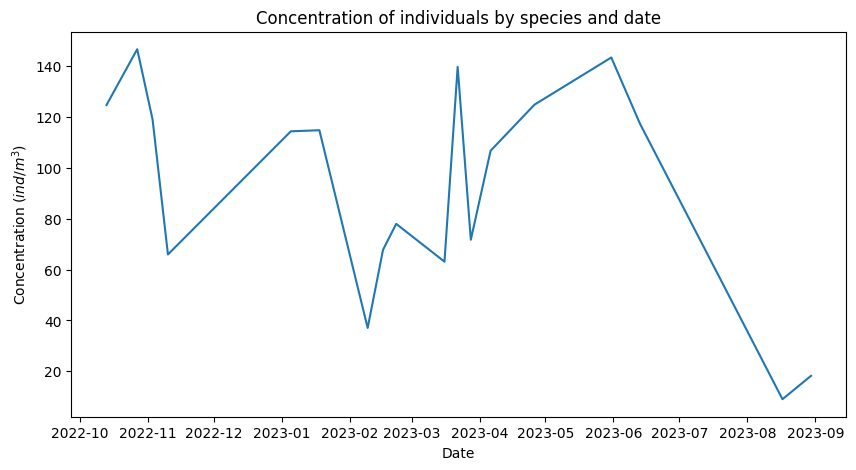

In [132]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Date", y="Concentration", data=total_conc100, markers=True, ci=None)
plt.title("Concentration of individuals by species and date")
plt.xlabel("Date")
plt.ylabel("Concentration ($ind/m^3$)")
plt.show()

<ipython-input-133-20f0b16cf485>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

<ipython-input-133-20f0b16cf485>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



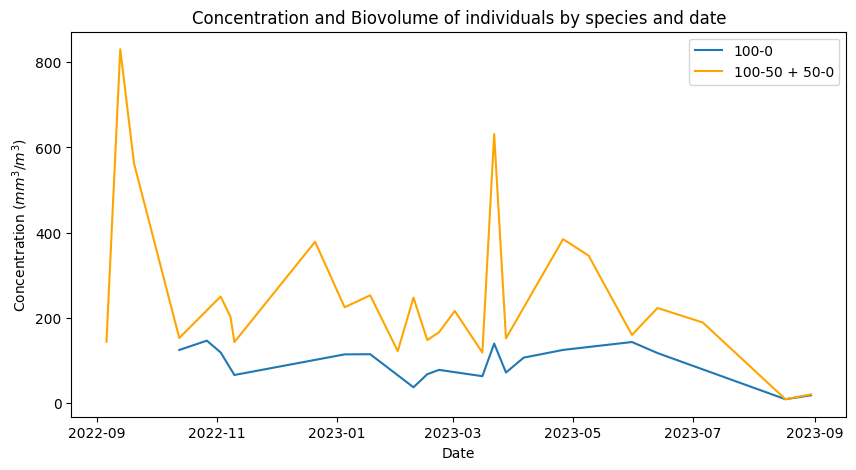

In [133]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# plot the first variable (Concentration) on the left y-axis
sns.lineplot(x="Date", y="Concentration", data=total_conc100, markers=True, ax=ax1, ci=None, label = "100-0")
ax1.set_xlabel('Date')
ax1.set_ylabel('Concentration ($ind/m^3$)')




sns.lineplot(x="Date", y="Concentration", data=total_conc, markers=True, ax=ax1, color='orange', ci=None, label = "100-50 + 50-0")
ax1.set_ylabel('Concentration ($mm^3/m^3$)')

plt.title("Concentration and Biovolume of individuals by species and date")
plt.legend()
plt.show()

In [134]:
print(total_conc)

         Date  Count  Concentration   Biovolume
0  2022-09-06    448     143.947484   67.225017
1  2022-09-13   1754     830.619355  229.840115
2  2022-09-20    954     562.353443  168.791239
3  2022-10-13    540     152.788388   39.553832
4  2022-11-03    884     250.120250   79.306802
5  2022-11-08    716     202.586085   50.234106
6  2022-11-10    506     143.168378   33.701278
7  2022-12-21    712     378.672093  116.493656
8  2023-01-05    795     224.944593   46.551290
9  2023-01-18    894     252.956822   49.986836
10 2023-02-01    431     121.951220   30.530782
11 2023-02-09    875     247.580782   77.603796
12 2023-02-16    523     147.978383   40.162258
13 2023-02-22    588     166.369578   39.883469
14 2023-03-02    764     216.167275   34.234389
15 2023-03-16    419     118.552471   26.206800
16 2023-03-22   2232     631.525337  233.480563
17 2023-03-28    537     151.939564   54.786283
18 2023-04-26   1360     384.800385   42.872426
19 2023-05-09   1223     346.037405   93

In [135]:
print(total_conc100)

         Date  Count  Concentration  Biovolume
0  2022-10-13    881     124.635713  19.392886
1  2022-10-27   1036     146.563676  26.640579
2  2022-11-03    841     118.976884  29.417163
3  2022-11-10    466      65.925360   8.497555
4  2023-01-05    808     114.308350  12.494875
5  2023-01-18    811     114.732762  11.910397
6  2023-02-09    262      37.065331   4.272093
7  2023-02-16    479      67.764480   8.343480
8  2023-02-22    551      77.950372   9.027663
9  2023-03-16    446      63.095945   7.578737
10 2023-03-22    987     139.631610  14.325329
11 2023-03-28    507      71.725660  13.516709
12 2023-04-06    754     106.668930  13.127174
13 2023-04-26    882     124.777184  18.137044
14 2023-05-31   1013     143.309849  27.846240
15 2023-06-13    830     117.420706  24.960268
16 2023-08-17     64       9.054127   1.399296
17 2023-08-30    129      18.249724   2.996708


In [ ]:
print(sample_comparison)

NameError: ignored

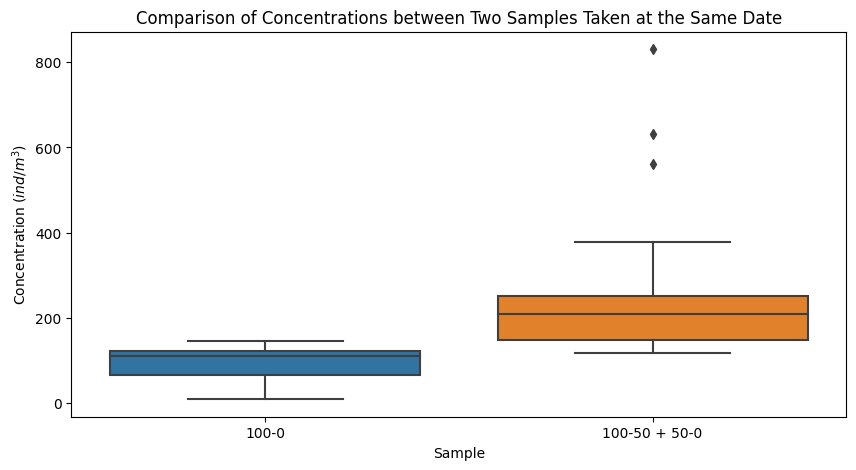

In [136]:
# create a new DataFrame with the concentrations for the two samples taken at each date
sample_comparison = pd.DataFrame()
sample_comparison['100-0'] = total_conc100['Concentration']
sample_comparison['100-50 + 50-0'] = total_conc['Concentration']

# create a grouped box plot to compare the distribution of concentrations between the two samples taken at each date
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=sample_comparison, ax=ax)
ax.set_xlabel('Sample')
ax.set_ylabel('Concentration ($ind/m^3$)')
ax.set_title('Comparison of Concentrations between Two Samples Taken at the Same Date')
plt.show()

In [137]:
merged = pd.merge(total_conc, total_conc100, on='Date', suffixes=('_total', '_total100'))
merged = merged[['Date', 'Concentration_total', 'Concentration_total100']]
merged['Difference'] = merged['Concentration_total'] - merged['Concentration_total100']


In [ ]:
merged['Difference'] = abs(merged['Difference'])

NameError: ignored

In [ ]:
print(merged)

NameError: ignored

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Set the x-axis labels
dates = merged['Date'].dt.strftime('%Y-%m-%d').tolist()

# Set the bar width
bar_width = 0.35

# Create the bar plots
plt.bar(range(len(dates)), merged['Concentration_total'], width=bar_width, label='total_conc')
plt.bar([i + bar_width for i in range(len(dates))], merged['Concentration_total100'], width=bar_width, label='total_conc100')

# Set the x-axis tick labels
plt.xticks([i + bar_width/2 for i in range(len(dates))], dates, rotation=45)

# Set the axis labels and title
plt.xlabel('Sampling Date')
plt.ylabel('Concentration')
plt.title('Variability between total_conc and total_conc100')

# Add a legend
plt.legend()

# Show the plot
plt.show()







NameError: ignored

<Figure size 1000x600 with 0 Axes>

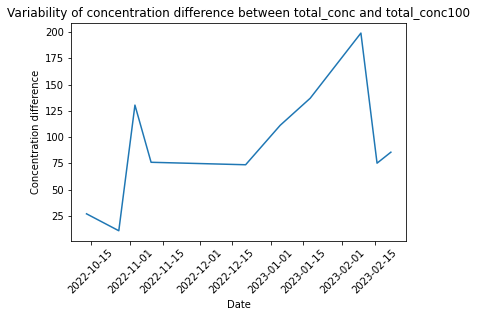

In [ ]:
sns.lineplot(x='Date', y='Difference', data=merged)
plt.xticks(rotation=45)
plt.title('Variability of concentration difference between total_conc and total_conc100')
plt.xlabel('Date')
plt.ylabel('Concentration difference')
plt.show()

NameError: ignored

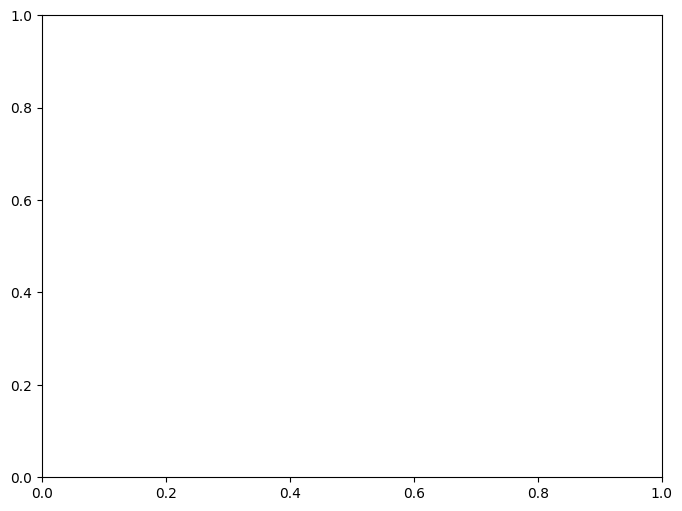

In [ ]:

fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=merged[['Concentration_total', 'Concentration_total100']].abs(), ax=ax)
ax.set_ylabel('Concentration (cells/mL)')
ax.set_xlabel('Sample')
ax.set_xticklabels(['Concentration_total', 'Concentration_total100'])
plt.show()